# Credit Risk

## Business Understanding

## Data Understanding

| column names           | description                                                                                                                                                                                                    |
|------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| loan_amnt              | The listed   amount of the loan applied for by the borrower. If at some point in time, the   credit department reduces the loan amount, then it will be reflected in this   value.                             |
| loan_status            | Current   status of the loan                                                                                                                                                                                   |
| term                   | The   number of payments on the loan. Values are in months and can be either 36 or   60.                                                                                                                       |
| last_credit_pull_d     | The   most recent month LC pulled credit for this loan                                                                                                                                                         |
| int_rate               | Interest   Rate on the loan                                                                                                                                                                                    |
| grade                  | LC   assigned loan grade                                                                                                                                                                                       |
| sub_grade              | LC   assigned loan subgrade                                                                                                                                                                                    |
| out_prncp              | Remaining   outstanding principal for total amount funded                                                                                                                                                      |
| out_prncp_inv          | Remaining   outstanding principal for portion of total amount funded by investors                                                                                                                              |
| issue_d                | The   month which the loan was funded                                                                                                                                                                          |
| total_rev_hi_lim       | Total revolving high   credit/credit limit                                                                                                                                                                     |
| annual_inc             | The   self-reported annual income provided by the borrower during registration.                                                                                                                                |
| tot_cur_bal            | Total current balance   of all accounts                                                                                                                                                                        |
| revol_util             | Revolving   line utilization rate, or the amount of credit the borrower is using relative   to all available revolving credit.                                                                                 |
| dti                    | A   ratio calculated using the borrower’s total monthly debt payments on the   total debt obligations, excluding mortgage and the requested LC loan, divided   by the borrower’s self-reported monthly income. |
| purpose                | A   category provided by the borrower for the loan request.                                                                                                                                                    |
| inq_last_6mths         | The   number of inquiries in past 6 months (excluding auto and mortgage inquiries)                                                                                                                             |
| home_ownership         | The   home ownership status provided by the borrower during registration. Our   values are: RENT, OWN, MORTGAGE, OTHER.                                                                                        |
| verified_status_joint  | Indicates if the   co-borrowers' joint income was verified by LC, not verified, or if the income   source was verified                                                                                         |
| total_rec_int          | Interest   received to date                                                                                                                                                                                    |
| earliest_cr_line       | The   month the borrower's earliest reported credit line was opened                                                                                                                                            |
| addr_state             | The   state provided by the borrower in the loan application                                                                                                                                                   |
| total_acc              | The   total number of credit lines currently in the borrower's credit file                                                                                                                                     |
| revol_bal              | Total   credit revolving balance                                                                                                                                                                               |
| emp_length             | Employment   length in years. Possible values are between 0 and 10 where 0 means less than   one year and 10 means ten or more years.                                                                          |
| installment            | The   monthly payment owed by the borrower if the loan originates.                                                                                                                                             |
| funded_amnt            | The   total amount committed to that loan at that point in time.                                                                                                                                               |
| mths_since_last_delinq | The   number of months since the borrower's last delinquency.                                                                                                                                                  |
| open_acc               | The   number of open credit lines in the borrower's credit file.                                                                                                                                               |
| pub_rec                | Number   of derogatory public records                                                                                                                                                                          |
| delinq_2yrs            | The   number of 30+ days past-due incidences of delinquency in the borrower's   credit file for the past 2 years                                                                                               |
| acc_now_delinq         | The number of   accounts on which the borrower is now delinquent.                                                                                                                                              |
| all_util               | Balance to credit   limit on all trades                                                                                                                                                                        |
| il_util                | Ratio of total   current balance to high credit/credit limit on all install acct                                                                                                                               |
| mths_since_last_record | The   number of months since the last public record.                                                                                                                                                           |
| policy_code            | publicly   available policy_code=1      new products not publicly available policy_code=2                                                                                                                      |
| application_type       | Indicates whether the   loan is an individual application or a joint application with two   co-borrowers                                                                                                       |

### Reading Package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

### Load Data

In [2]:
data = pd.read_csv('lending_club_14_17_practice.csv')

print(f'total rows    : {data.shape[0]}')
print(f'total columns : {data.shape[1]}')

total rows    : 466285
total columns : 37


In [3]:
data.head()

id  loan_status  loan_amnt        term last_credit_pull_d  int_rate  \
0  1077501   Fully Paid       5000   36 months             Jan-16     10.65   
1  1077430  Charged Off       2500   60 months             Sep-13     15.27   
2  1077175   Fully Paid       2400   36 months             Jan-16     15.96   
3  1076863   Fully Paid      10000   36 months             Jan-15     13.49   
4  1075358      Current       3000   60 months             Jan-16     12.69   

  grade sub_grade  out_prncp issue_d  total_rev_hi_lim  annual_inc  \
0     B        B2        0.0  Dec-11               NaN     24000.0   
1     C        C4        0.0  Dec-11               NaN     30000.0   
2     C        C5        0.0  Dec-11               NaN     12252.0   
3     C        C1        0.0  Dec-11               NaN     49200.0   
4     B        B5      766.9  Dec-11               NaN     80000.0   

   tot_cur_bal  revol_util    dti         purpose  inq_last_6mths  \
0          NaN        83.7  27.65     credit_card             1.0   
1          NaN         9.4   1.00             car             5.0   
2          NaN        98.5   8.72  small_business             2.0   
3          NaN        21.0  20.00           other             1.0   
4          NaN        53.9  17.94           other             0.0   

  home_ownership verification_status  total_rec_int earliest_cr_line  \
0           RENT            Verified         861.07           Jan-85   
1           RENT     Source Verified         435.17           Apr-99   
2           RENT        Not Verified         603.65           Nov-01   
3           RENT     Source Verified        2209.33           Feb-96   
4           RENT     Source Verified        1009.07           Jan-96   

  addr_state  total_acc  revol_bal emp_length  installment  funded_amnt  \
0         AZ        9.0      13648  10+ years       162.87         5000   
1         GA        4.0       1687   < 1 year        59.83         2500   
2         IL       10.0       2956  10+ years        84.33         2400   
3         CA       37.0       5598  10+ years       339.31        10000   
4         OR       38.0      27783     1 year        67.79         3000   

   mths_since_last_delinq  open_acc  pub_rec  delinq_2yrs  acc_now_delinq  \
0                     NaN       3.0      0.0          0.0             0.0   
1                     NaN       3.0      0.0          0.0             0.0   
2                     NaN       2.0      0.0          0.0             0.0   
3                    35.0      10.0      0.0          0.0             0.0   
4                    38.0      15.0      0.0          0.0             0.0   

   all_util  il_util  mths_since_last_record  policy_code application_type  
0       NaN      NaN                     NaN            1       INDIVIDUAL  
1       NaN      NaN                     NaN            1       INDIVIDUAL  
2       NaN      NaN                     NaN            1       INDIVIDUAL  
3       NaN      NaN                     NaN            1       INDIVIDUAL  
4       NaN      NaN                     NaN            1       INDIVIDUAL

In [4]:
data = data.set_index('id')

### Check Data Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 1077501 to 9199665
Data columns (total 36 columns):
loan_status               466285 non-null object
loan_amnt                 466285 non-null int64
term                      466285 non-null object
last_credit_pull_d        466243 non-null object
int_rate                  466285 non-null float64
grade                     466285 non-null object
sub_grade                 466285 non-null object
out_prncp                 466285 non-null float64
issue_d                   466285 non-null object
total_rev_hi_lim          396009 non-null float64
annual_inc                466281 non-null float64
tot_cur_bal               396009 non-null float64
revol_util                465945 non-null float64
dti                       466285 non-null float64
purpose                   466285 non-null object
inq_last_6mths            466256 non-null float64
home_ownership            466285 non-null object
verification_status       466285 non-null 

  
**__Columns that has incorrect data types__**  

1. term :  [' 36 months' ' 60 months'] => we need only the digit of it in months unit  
2. emp_length :  ['10+ years' '< 1 year']    => we need only the digit of it in year unit  
3. issue_d  : ['Dec-11' 'Dec-11']  => we have to change it to datetime
4. earliest_cr_line : ['Jan-85' 'Apr-99'] => we have to change it to date => change it with the relative date
5. last_credit_pull_d : ['Jan-16' 'Sep-13'] => we have to change it to date => change it with the relative date


**There are also some columns that doesn't have any data, We should deal with it later**

#### Object to Integer

In [6]:
# peek unique value of term
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [7]:
data['term_int'] = data["term"].str.extract('(\d+)')
data['term_int'] = pd.to_numeric(data['term_int'], errors='coerce', downcast='integer')

print(f"'term_int' : {data['term_int'].dtype}")

'term_int' : int8


In [8]:
# emp length
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
# emp_length
data['emp_length_int'] = data["emp_length"].str.extract('(\d+)')
data['emp_length_int'] = pd.to_numeric(data['emp_length_int'], errors='coerce', downcast='integer')

print(f"'emp_length_int' : {data['emp_length_int'].dtype}")

'emp_length_int' : float64


#### Converting datetime

In [10]:
# issue_d 
data['issue_d'] = pd.to_datetime(data['issue_d'].values, format='%b-%y')
print("min date :", data["issue_d"].min(), "max date :", data["issue_d"].max())

min date : 2007-06-01 00:00:00 max date : 2014-12-01 00:00:00


In [11]:
# earliest_cr_line
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'].values, format='%b-%y')
print("min date :", data["earliest_cr_line"].min(), "max date :", data["earliest_cr_line"].max())

min date : 1969-01-01 00:00:00 max date : 2068-12-01 00:00:00


In [12]:
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda x: data["earliest_cr_line"].min() if x.year > 2020 else x)
print("min date :", data["earliest_cr_line"].min(), "max date :", data["earliest_cr_line"].max()) 

min date : 1969-01-01 00:00:00 max date : 2011-11-01 00:00:00


In [13]:
# last_credit_pull_d
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'].values, format='%b-%y')
print("min date :", data["last_credit_pull_d"].min(), "max date :", data["last_credit_pull_d"].max()) 

min date : 2007-05-01 00:00:00 max date : 2016-01-01 00:00:00


After converting to datetime we still not be able to put it into our model, let's create a relative date to make it integer

In [14]:
date_reference = pd.to_datetime('2017-01-01')

In [15]:
# mths_earliest_cr_line : month since earliest credit line
data['mths_earliest_cr_line'] = round(pd.to_numeric((date_reference - data['earliest_cr_line'])\
                                                    / np.timedelta64(1, 'M')))
data[['mths_earliest_cr_line', 'earliest_cr_line']].head()

mths_earliest_cr_line earliest_cr_line
id                                             
1077501                  384.0       1985-01-01
1077430                  213.0       1999-04-01
1077175                  182.0       2001-11-01
1076863                  251.0       1996-02-01
1075358                  252.0       1996-01-01

In [16]:
# mths_issue_date : month since issue date
data['mths_issue_date'] = round(pd.to_numeric((date_reference - data['issue_d'])\
                                                    / np.timedelta64(1, 'M')))
data[['mths_issue_date', 'issue_d']].head()

mths_issue_date    issue_d
id                                 
1077501             61.0 2011-12-01
1077430             61.0 2011-12-01
1077175             61.0 2011-12-01
1076863             61.0 2011-12-01
1075358             61.0 2011-12-01

In [17]:
# mths_last_credit_pull_date : month since last credit pull date
data['mths_last_credit_pull_date'] = round(pd.to_numeric((date_reference - data['last_credit_pull_d'])\
                                                    / np.timedelta64(1, 'M')))
data[['mths_last_credit_pull_date', 'last_credit_pull_d']].head()

mths_last_credit_pull_date last_credit_pull_d
id                                                    
1077501                        12.0         2016-01-01
1077430                        40.0         2013-09-01
1077175                        12.0         2016-01-01
1076863                        24.0         2015-01-01
1075358                        12.0         2016-01-01

In [18]:
cols_to_drop = ['last_credit_pull_d', 'issue_d', 'earliest_cr_line', 'emp_length', 'term_int']

data = data.drop(columns=cols_to_drop)
print(data.shape)

(466285, 36)


Great we are done converting our data type. Let's check it again

### Summary Statistics

In [19]:
data.describe(include=np.number).T

count           mean            std      min  \
loan_amnt                   466285.0   14317.277577    8286.509164   500.00   
int_rate                    466285.0      13.829236       4.357587     5.42   
out_prncp                   466285.0    4410.062342    6355.078769     0.00   
total_rev_hi_lim            396009.0   30379.087771   37247.129571     0.00   
annual_inc                  466281.0   73277.381470   54963.568654  1896.00   
tot_cur_bal                 396009.0  138801.713385  152114.663494     0.00   
revol_util                  465945.0      56.176947      23.732628     0.00   
dti                         466285.0      17.218758       7.851121     0.00   
inq_last_6mths              466256.0       0.804745       1.091598     0.00   
total_rec_int               466285.0    2588.677225    2483.809661     0.00   
total_acc                   466256.0      25.064430      11.600141     1.00   
revol_bal                   466285.0   16230.203487   20676.245152     0.00   
installment                 466285.0     432.061201     243.485550    15.67   
funded_amnt                 466285.0   14291.801044    8274.371300   500.00   
mths_since_last_delinq      215934.0      34.104430      21.778487     0.00   
open_acc                    466256.0      11.187069       4.987526     0.00   
pub_rec                     466256.0       0.160564       0.510863     0.00   
delinq_2yrs                 466256.0       0.284678       0.797365     0.00   
acc_now_delinq              466256.0       0.004002       0.068637     0.00   
all_util                         0.0            NaN            NaN      NaN   
il_util                          0.0            NaN            NaN      NaN   
mths_since_last_record       62638.0      74.306012      30.357653     0.00   
policy_code                 466285.0       1.000000       0.000000     1.00   
emp_length_int              445277.0       6.074774       3.500574     1.00   
mths_earliest_cr_line       466256.0     231.385374      86.460310    62.00   
mths_issue_date             466285.0      40.255187      14.340154    25.00   
mths_last_credit_pull_date  466243.0      16.045588       9.636423    12.00   

                                 25%       50%        75%         max  
loan_amnt                    8000.00  12000.00   20000.00    35000.00  
int_rate                       10.99     13.66      16.49       26.06  
out_prncp                       0.00    441.47    7341.65    32160.38  
total_rev_hi_lim            13500.00  22800.00   37900.00  9999999.00  
annual_inc                  45000.00  63000.00   88960.00  7500000.00  
tot_cur_bal                 28618.00  81539.00  208953.00  8000078.00  
revol_util                     39.20     57.60      74.70      892.30  
dti                            11.36     16.87      22.78       39.99  
inq_last_6mths                  0.00      0.00       1.00       33.00  
total_rec_int                 957.28   1818.88    3304.53    24205.62  
total_acc                      17.00     23.00      32.00      156.00  
revol_bal                    6413.00  11764.00   20333.00  2568995.00  
installment                   256.69    379.89     566.58     1409.99  
funded_amnt                  8000.00  12000.00   20000.00    35000.00  
mths_since_last_delinq         16.00     31.00      49.00      188.00  
open_acc                        8.00     10.00      14.00       84.00  
pub_rec                         0.00      0.00       0.00       63.00  
delinq_2yrs                     0.00      0.00       0.00       29.00  
acc_now_delinq                  0.00      0.00       0.00        5.00  
all_util                         NaN       NaN        NaN         NaN  
il_util                          NaN       NaN        NaN         NaN  
mths_since_last_record         53.00     76.00     102.00      129.00  
policy_code                     1.00      1.00       1.00        1.00  
emp_length_int                  3.00      6.00      10.00       10.00  
mths_earliest_cr_l

Look at 75% and max value!  
There are some outliers in our data, we have to prepare to handle this outliers.  

The mean of our variable also very different with each other, when we use algorithm for modeling be careful about this difference, especially if you are using distanced based algorithm like e.g SVM or KNN.

policy code also just have one value in its data. lets just drop it since it will not have much informations

In [20]:
data.describe(include=np.object).T

count unique                 top    freq
loan_status          466285      9             Current  224226
term                 466285      2           36 months  337953
grade                466285      7                   B  136929
sub_grade            466285     35                  B3   31686
purpose              466285     14  debt_consolidation  274195
home_ownership       466285      6            MORTGAGE  235875
verification_status  466285      3            Verified  168055
addr_state           466285     50                  CA   71450
application_type     466285      1          INDIVIDUAL  466285

In [21]:
data['policy_code'].unique()

array([1])

In [22]:
data = data.drop(columns=['application_type', 'policy_code'])
print(data.shape)

(466285, 34)


Look there is predictor that only have 1 unique value, we should drop it!   
Why? because it will not contain any information to our model.

> great we now have a glimpse of our data. we usually look into mean and percentile for continous variable and number of unique for and top freq and count for categorical.  

But it is still hard to understand our data by just summary statistics. don't worry we will get into that later.

### Check Missing Value

In [23]:
def missing_value(df):
    """ function to return number of missing value and its percentage
    """
    cols = df.columns.values
    miss_df = pd.DataFrame(index=cols) 
    miss_df['nunique'] = df.nunique() 
    miss_df["no_missing"] = df.isnull().sum()
    miss_df["pct_missing"] = miss_df["no_missing"] / df.isnull().count()
    miss_df["type"] = df.dtypes

    return miss_df.sort_values(by=["pct_missing"], ascending=False)

In [24]:
missing_df = missing_value(data)
missing_df

nunique  no_missing  pct_missing     type
all_util                          0      466285     1.000000  float64
il_util                           0      466285     1.000000  float64
mths_since_last_record          123      403647     0.865666  float64
mths_since_last_delinq          145      250351     0.536906  float64
tot_cur_bal                  220690       70276     0.150715  float64
total_rev_hi_lim              14612       70276     0.150715  float64
emp_length_int                   10       21008     0.045054  float64
revol_util                     1269         340     0.000729  float64
mths_last_credit_pull_date      103          42     0.000090  float64
mths_earliest_cr_line           515          29     0.000062  float64
acc_now_delinq                    6          29     0.000062  float64
inq_last_6mths                   28          29     0.000062  float64
delinq_2yrs                      24          29     0.000062  float64
pub_rec                          26          29     0.000062  float64
open_acc                         62          29     0.000062  float64
total_acc                       112          29     0.000062  float64
annual_inc                    31901           4     0.000009  float64
installment                   55622           0     0.000000  float64
mths_issue_date                  91           0     0.000000  float64
funded_amnt                    1354           0     0.000000    int64
loan_status                       9           0     0.000000   object
revol_bal                     58142           0     0.000000    int64
loan_amnt                      1352           0     0.000000    int64
total_rec_int                270249           0     0.000000  float64
verification_status               3           0     0.000000   object
home_ownership                    6           0     0.000000   object
purpose                          14           0     0.000000   object
dti                            3997           0     0.000000  float64
out_prncp                    135665           0     0.000000  float64
sub_grade                        35           0     0.000000   object
grade                             7           0     0.000000   object
int_rate                        506           0     0.000000  float64
term                              2           0     0.000000   object
addr_state                       50           0     0.000000   object

In [25]:
cols_to_drop = missing_df.loc[missing_df['pct_missing'] > 0.75].index.tolist()

print(cols_to_drop)

['all_util', 'il_util', 'mths_since_last_record']


In [26]:
data = data.drop(columns=cols_to_drop)
data.shape

(466285, 31)

There are some predictors that have more than 75% missing value.  

usually I prefer to delete it, since it will be hard to approximate/handling this missing value later, but be careful when you drop the columns you have to ensure that it will not have much informations

### Variable Definition

#### Dependent Varible Definition

In [27]:
data['loan_status'].unique().tolist()

['Fully Paid',
 'Charged Off',
 'Current',
 'Default',
 'Late (31-120 days)',
 'In Grace Period',
 'Late (16-30 days)',
 'Does not meet the credit policy. Status:Fully Paid',
 'Does not meet the credit policy. Status:Charged Off']

In [28]:
data['loan_status'].value_counts() / data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [29]:
bad_definition = [
            'Charged Off',
            'Default',
            'Late (31-120 days)',
            'Does not meet the credit policy. Status:Charged Off'
]
# flag 1 is good, 0 is bad
data["target"] = np.where(data["loan_status"].isin(bad_definition), 1, 0)
data["target"].value_counts(normalize=True)

0    0.890693
1    0.109307
Name: target, dtype: float64

In [30]:
col_target = 'target'

Great the company is having much lower bad loan compare to good one, eventhough it is actually quite high bad percentage, this one is expected to have imbalanced class like this in credit risk modeling. 

#### Independent Variable Definition

In [31]:
data.columns.tolist()

['loan_status',
 'loan_amnt',
 'term',
 'int_rate',
 'grade',
 'sub_grade',
 'out_prncp',
 'total_rev_hi_lim',
 'annual_inc',
 'tot_cur_bal',
 'revol_util',
 'dti',
 'purpose',
 'inq_last_6mths',
 'home_ownership',
 'verification_status',
 'total_rec_int',
 'addr_state',
 'total_acc',
 'revol_bal',
 'installment',
 'funded_amnt',
 'mths_since_last_delinq',
 'open_acc',
 'pub_rec',
 'delinq_2yrs',
 'acc_now_delinq',
 'emp_length_int',
 'mths_earliest_cr_line',
 'mths_issue_date',
 'mths_last_credit_pull_date',
 'target']

In [32]:
cols_nopred = ['target', 'loan_status']
cols_pred = [
    col for col in data.columns if col not in cols_nopred
]

print(cols_pred)

['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'out_prncp', 'total_rev_hi_lim', 'annual_inc', 'tot_cur_bal', 'revol_util', 'dti', 'purpose', 'inq_last_6mths', 'home_ownership', 'verification_status', 'total_rec_int', 'addr_state', 'total_acc', 'revol_bal', 'installment', 'funded_amnt', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'delinq_2yrs', 'acc_now_delinq', 'emp_length_int', 'mths_earliest_cr_line', 'mths_issue_date', 'mths_last_credit_pull_date']


In [33]:
cols_pred_num = [ col for col in data[cols_pred].select_dtypes(np.number).columns.tolist() if data[col].nunique() > 5]
print(cols_pred_num)

['loan_amnt', 'int_rate', 'out_prncp', 'total_rev_hi_lim', 'annual_inc', 'tot_cur_bal', 'revol_util', 'dti', 'inq_last_6mths', 'total_rec_int', 'total_acc', 'revol_bal', 'installment', 'funded_amnt', 'mths_since_last_delinq', 'open_acc', 'pub_rec', 'delinq_2yrs', 'acc_now_delinq', 'emp_length_int', 'mths_earliest_cr_line', 'mths_issue_date', 'mths_last_credit_pull_date']


In [34]:
cols_pred_cat = list(set(cols_pred) - set(cols_pred_num))
print(cols_pred_cat)

['term', 'sub_grade', 'grade', 'addr_state', 'purpose', 'home_ownership', 'verification_status']


In [35]:
for col in cols_pred_cat:
    data[col] = data[col].astype('O')

## Split Dataset

In [36]:
from sklearn.model_selection import train_test_split

def data_sample_split(data, 
                      sample_sizes=[0.6, 0.2, 0.2], 
                      sample_names=["train", "valid", "test"], 
                      stratified_by=[col_target],
                      random_seed  = 42
                     ):
    """
    function to split into several data sample based on proportion
    param:
    data := `pd.DataFrame` -- dataframe to be split
    sample_sizes := `list` -- dataframe to be split, sum should be equal to 1
    sample_names := `list` -- dataframe to be split, length of list should be equal to sample_sizes
    stratified_by = 'list' -- list of columns to be stratified
    return: boolean index of each sample
    """
    
    # initialized
    ix = data.index                              # index to be split
    sample_df = pd.DataFrame(index=data.index)   # initialized final dataframe to be filled
    sample_df["data_type"] = None                # filled by None
    stratified = data[stratified_by]             # create dataframe of stratified columns
    
    # 
    for i in range(len(sample_sizes) - 1):
        idx1, idx2 = train_test_split(ix, 
                                      test_size = 1 - sample_sizes[i], 
                                      stratify=stratified, 
                                      random_state=random_seed
                                     )
        
        sample_df.loc[idx1] = sample_names[i]
        
        if i == len(sample_sizes) - 2:
            sample_df.loc[idx2] = sample_names[-1]
        else:
            sample_sizes = [ss / sum(sample_sizes[i+1:]) for ss in sample_sizes]
            stratified = data.loc[idx2, stratified_by]
            ix = idx2
    
    return sample_df["data_type"]

In [37]:
data["data_type"] = data_sample_split(data,
                                      sample_sizes=[0.6, 0.2, 0.2],
                                      sample_names=["train", "valid", "test"],
                                      stratified_by=[col_target],
                                      random_seed = 42
                                     )
data["data_type"].value_counts()

train    279771
test      93257
valid     93257
Name: data_type, dtype: int64

In [38]:
mask_train = data["data_type"] == "train"
mask_valid = data["data_type"] == "valid"
mask_test = data["data_type"] == "test"

## Data Exploration

Let's see the relations between predictors and dependent variable.

### Categorical Variable

In [39]:
col = 'grade'
grouped_data = data.groupby(col)[col_target].agg(['count', 'sum'])\
                    .rename(columns={
                            "count": "total",
                            "sum": "bad"
                            }).reset_index()
grouped_data["bad_rate"] = grouped_data["bad"] / grouped_data["total"]
grouped_data

grade   total    bad  bad_rate
0     A   74867   2897  0.038695
1     B  136929  10759  0.078574
2     C  125293  14384  0.114803
3     D   76888  11848  0.154094
4     E   35757   6964  0.194759
5     F   13229   3192  0.241288
6     G    3322    924  0.278146

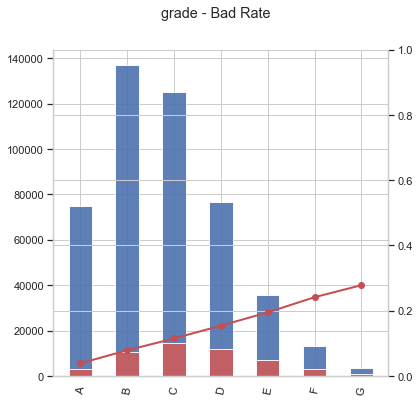

In [40]:
fig, ax1 = plt.subplots(figsize=(6, 6))
_ = sns.despine(ax=ax1, top=True, left=False, right=False, bottom=False)


# create barplot
_ = ax1.bar(x=grouped_data[col], height=grouped_data["total"], width=0.5, alpha=0.9)
_ = ax1.bar(x=grouped_data[col], height=grouped_data["bad"], width=0.5, color="indianred", alpha=0.9)
_ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=79)

ax2 = ax1.twinx()

_ = ax2.set_ylim([0, 1])
_ = sns.despine(ax=ax2, top=True, left=False, right=False, bottom=False)
_ = ax2.plot(grouped_data[col], grouped_data["bad_rate"], 'r', linewidth=2, marker="o")
_ = ax1.set_axisbelow(True)
_ = ax2.set_axisbelow(True)
_ = fig.suptitle(f"{col} - Bad Rate")

Here we can clearly see the relation to dependent variable from group A to group G there is increasing bad rate.  
Let's create a function to create this plot for further use.

In [41]:
def plot_bar_univariate(data, col, col_target, sort_by_rate=True, **kwargs):
    """ function to plot bar on categories variable and their relation with binary target.
    return plot bar
    """
    # initialized data
    grouped_data = data.groupby(col)[col_target]\
                        .agg(['count', 'sum'])\
                        .reset_index()\
                        .rename(columns={
        "count": "total",
        "sum": "bad"
    })
    grouped_data["bad_rate"] = grouped_data["bad"] / grouped_data["total"]
    if sort_by_rate:
        grouped_data.sort_values(by="bad_rate", ascending=True, inplace=True)
    
    # initialized figure
    sns.set(style="whitegrid")
    
    fig, ax1 = plt.subplots(**kwargs)
    _ = sns.despine(ax=ax1, top=True, left=False, right=False, bottom=False)
    

    # create barplot
    _ = ax1.bar(x=grouped_data[col], height=grouped_data["total"], alpha=0.9)
    _ = ax1.bar(x=grouped_data[col], height=grouped_data["bad"], color="indianred", alpha=0.9)
    _ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    ax2 = ax1.twinx()
    _ = ax2.set_ylim([0, 1])
    _ = sns.despine(ax=ax2, top=True, left=False, right=False, bottom=False)
    _ = ax2.plot(grouped_data[col], grouped_data["bad_rate"], 'r', linewidth=2, marker="o")
    _ = ax1.set_axisbelow(True)
    _ = ax2.set_axisbelow(True)
    _ = fig.suptitle(f"{col} - Bad Rate")
    plt.show()
    # create line rate
    return grouped_data

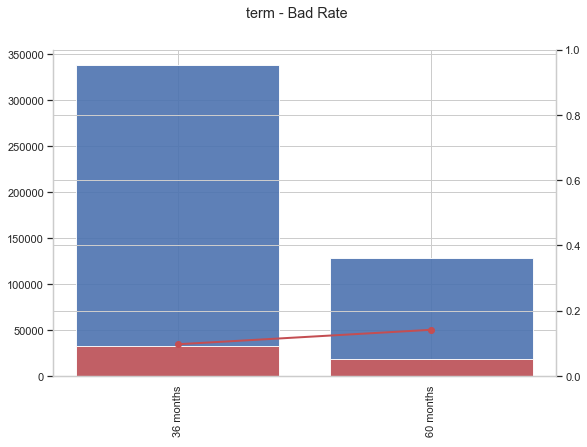

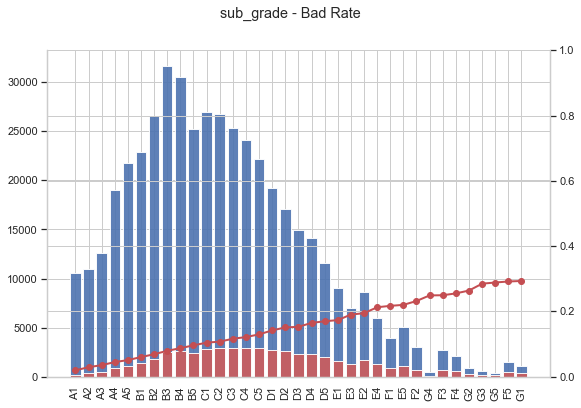

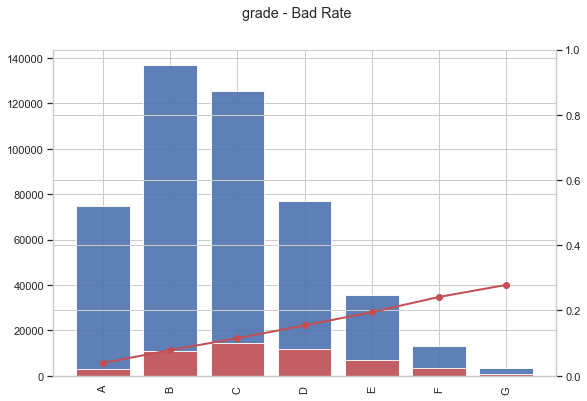

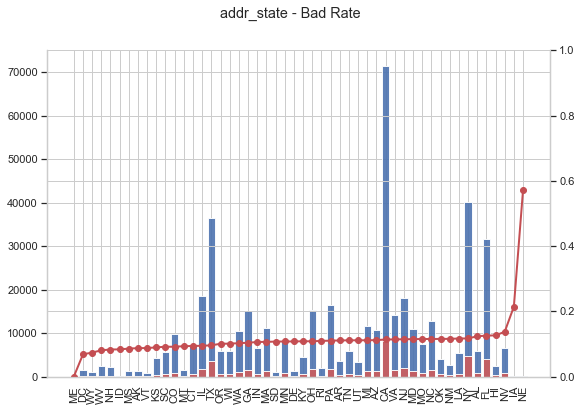

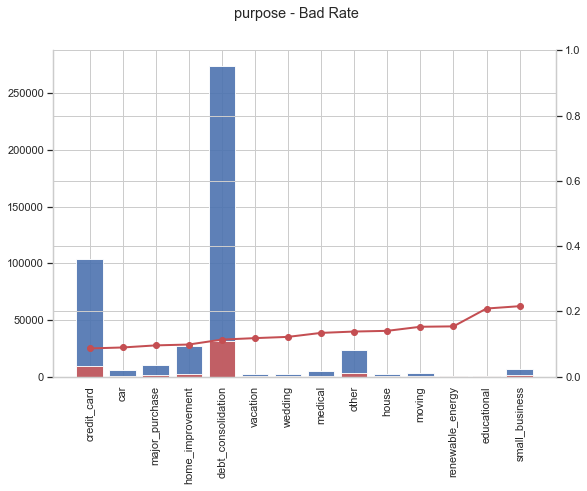

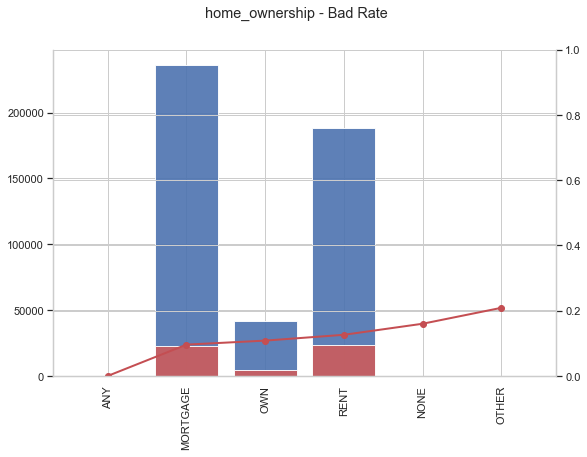

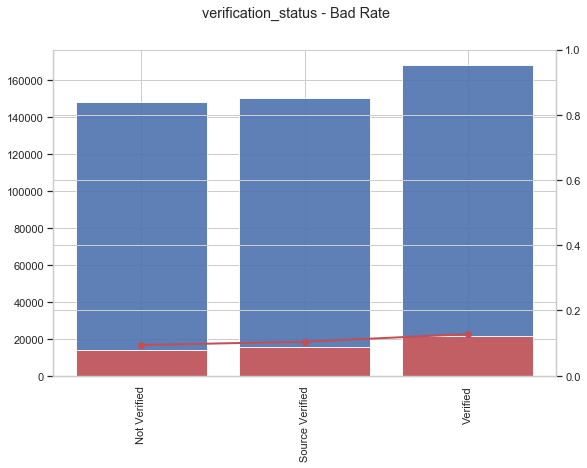

In [42]:
for col in cols_pred_cat:
    grouped_data = plot_bar_univariate(data, col, col_target, sort_by_rate=True, figsize=(9, 6))

From the graph above. Please conclude the relation for the following predictors to dependent variable.  

1. 

### Continous Variable

In [43]:
def plot_bar_univariate_cont(X, y, nbins=10):
    """ function to plot bar on categories variable and their relation with binary target.
    return plot bar
    """
    # initialized data
    
    col = X.name
    col_target = y.name
    if X.nunique() < nbins:
        nbins = X.nunique()
    
    series = pd.cut(X, bins=nbins)
    data = pd.concat([series, y], axis=1)
    grouped_data = data.groupby(series)[col_target]\
                        .agg(['count', 'sum'])\
                        .reset_index()\
                        .rename(columns={
        "count": "total",
        "sum": "bad"
    })
    grouped_data[col] = grouped_data.astype(str)
    grouped_data["bad_rate"] = grouped_data["bad"] / grouped_data["total"]
    
    # initialized figure
    sns.set(style="whitegrid")
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(14, 6.5))
    _ = sns.despine(ax=ax1, top=True, left=False, right=False, bottom=False)
    

    # create barplot
    _ = ax1.bar(x=grouped_data[col], height=grouped_data["total"], width=1, alpha=0.9)
    _ = ax1.bar(x=grouped_data[col], height=grouped_data["bad"], width=1, color="indianred", alpha=0.9)
    _ = plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    ax2 = ax1.twinx()
    _ = ax2.set_ylim([0, 1])
    _ = sns.despine(ax=ax2, top=True, left=False, right=False, bottom=False)
    _ = ax2.plot(grouped_data[col], grouped_data["bad_rate"], 'r', linewidth=2, marker="o")
    _ = ax1.set_axisbelow(True)
    _ = ax2.set_axisbelow(True)
    _ = ax1.set_title(f"{col} - Bad Rate")
    
    
    _ = sns.boxplot(x=y, y=X, ax=ax3)
    plt.show()
    
    return grouped_data

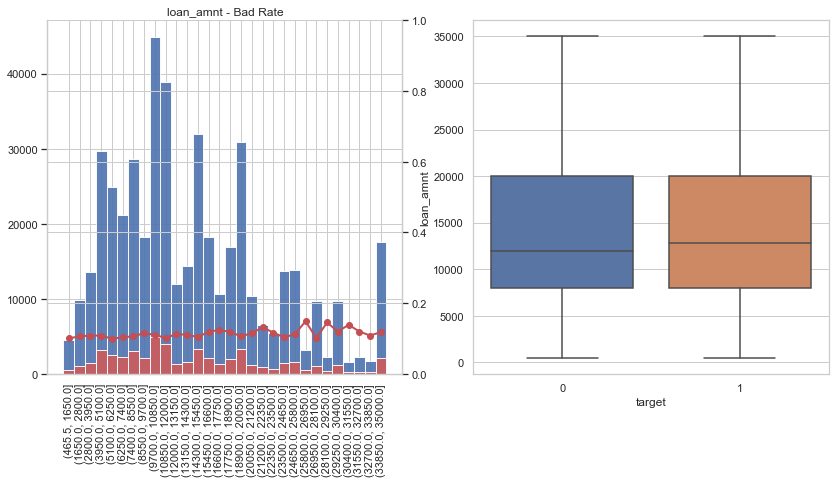

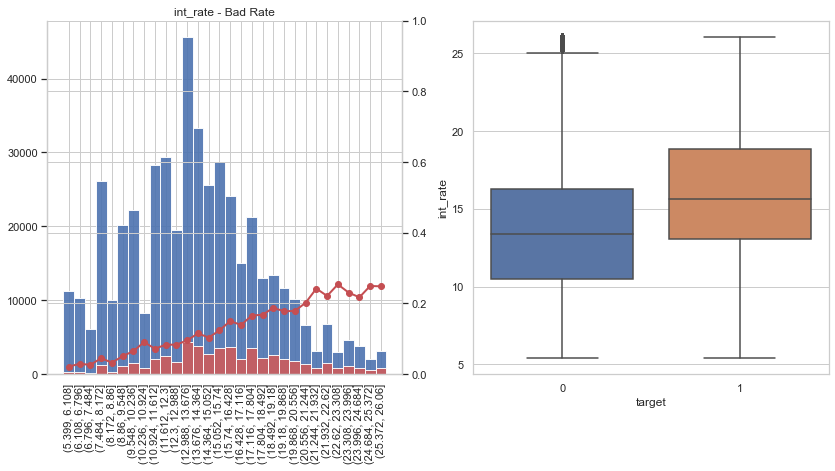

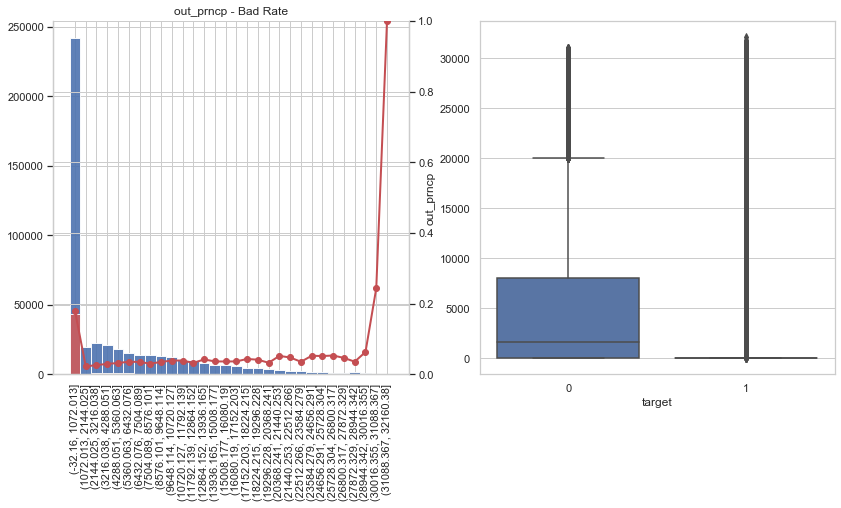

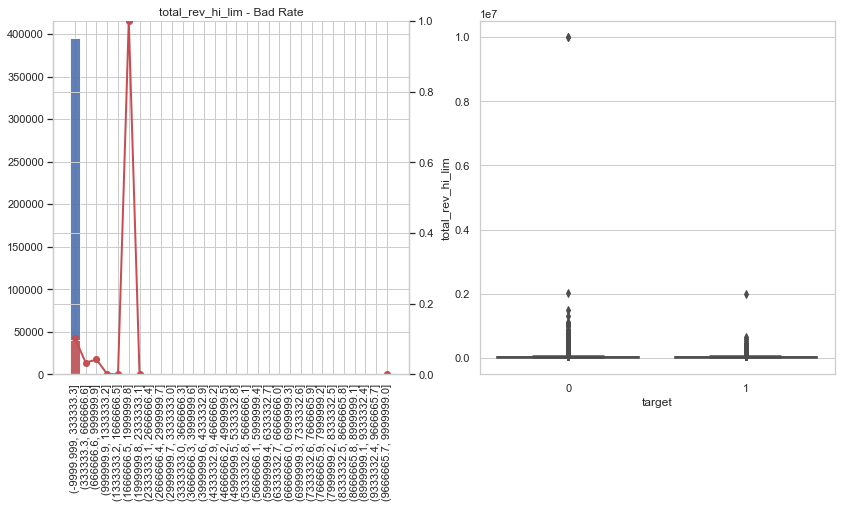

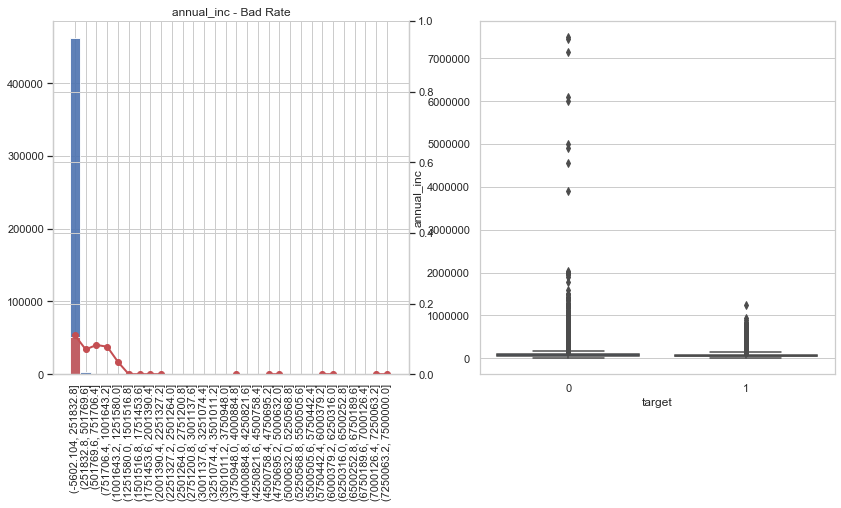

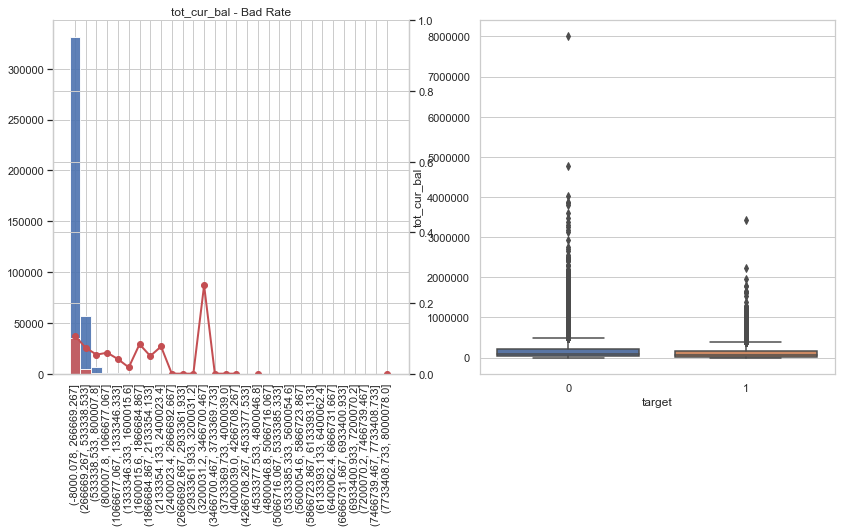

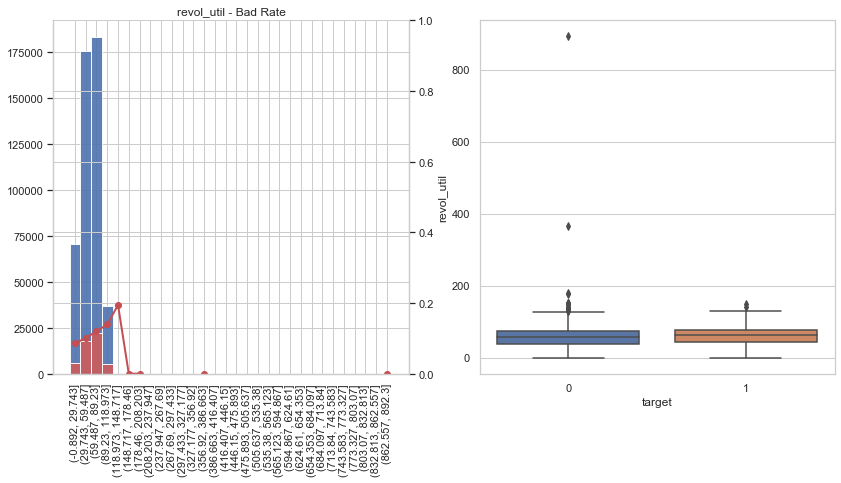

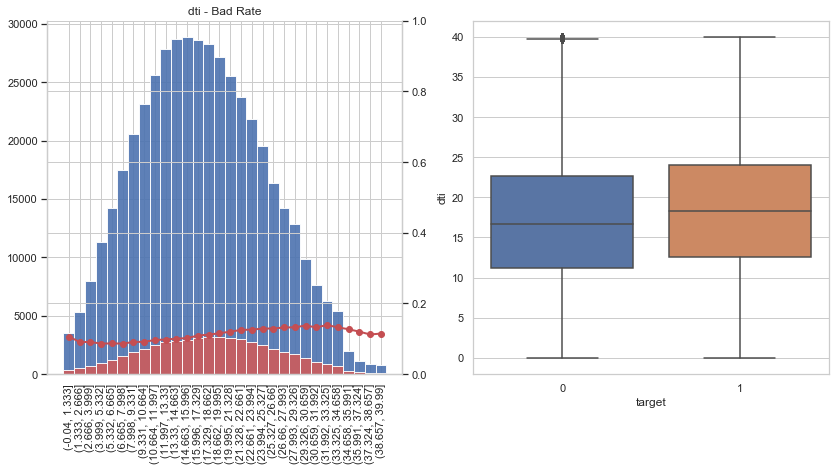

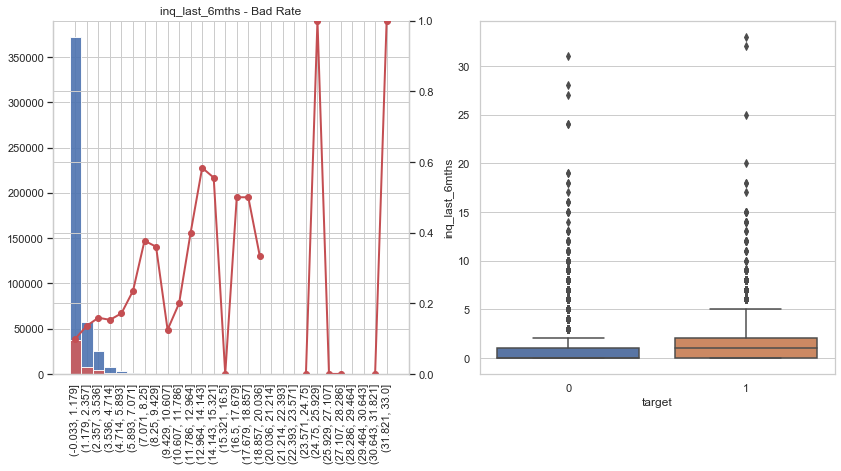

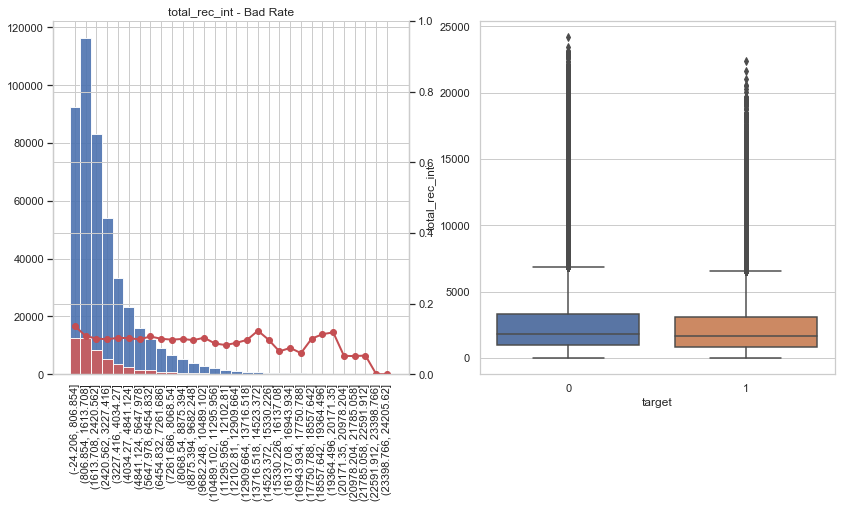

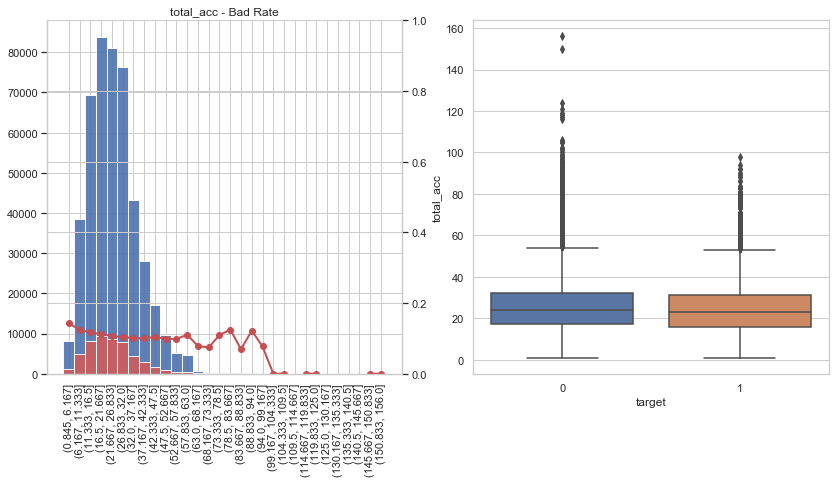

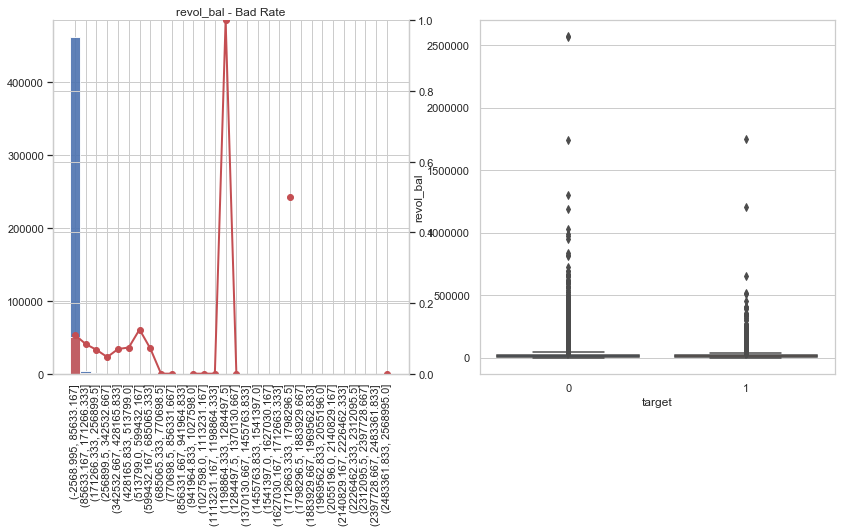

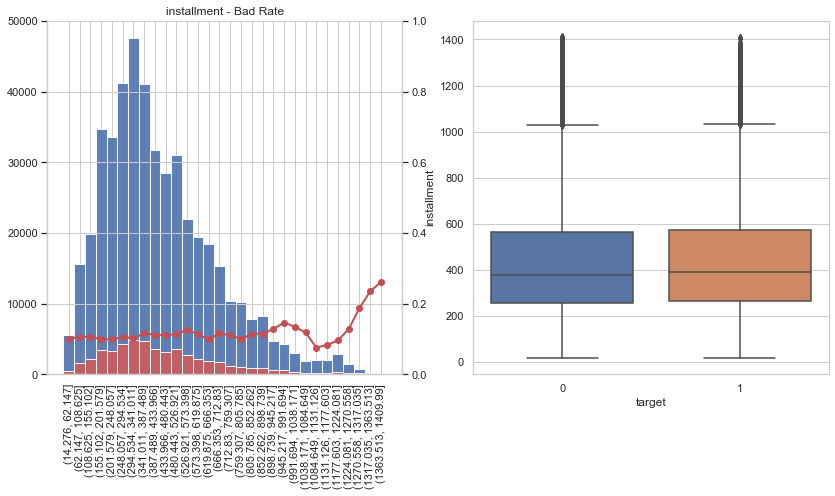

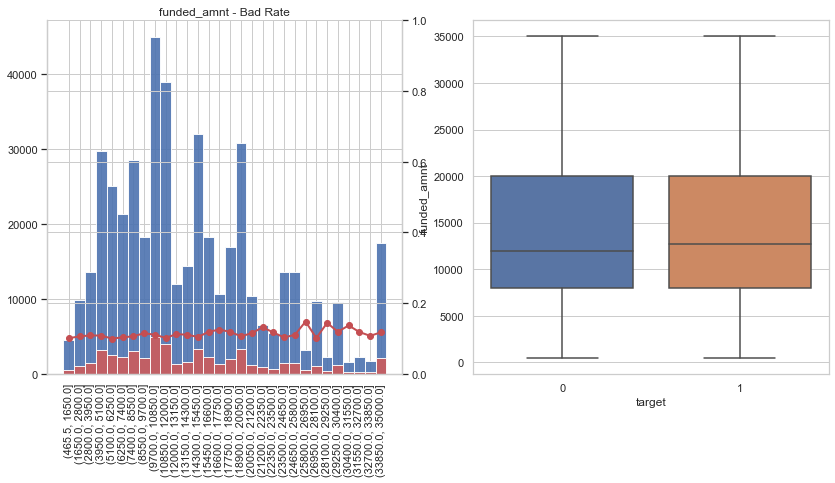

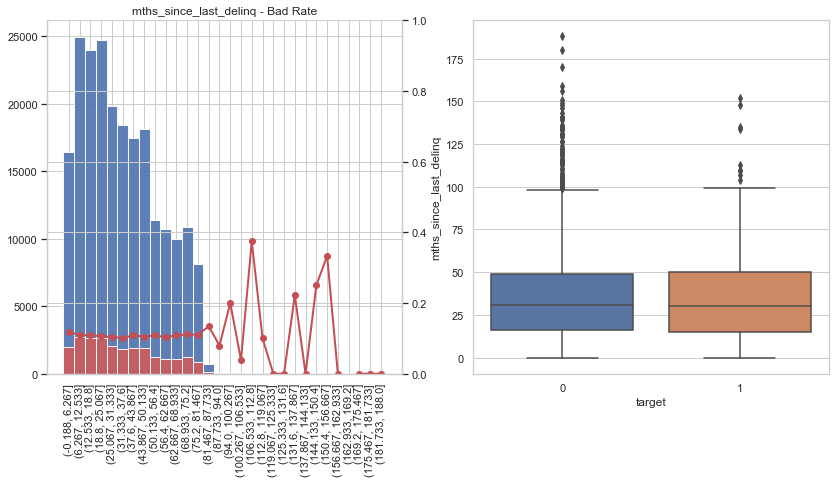

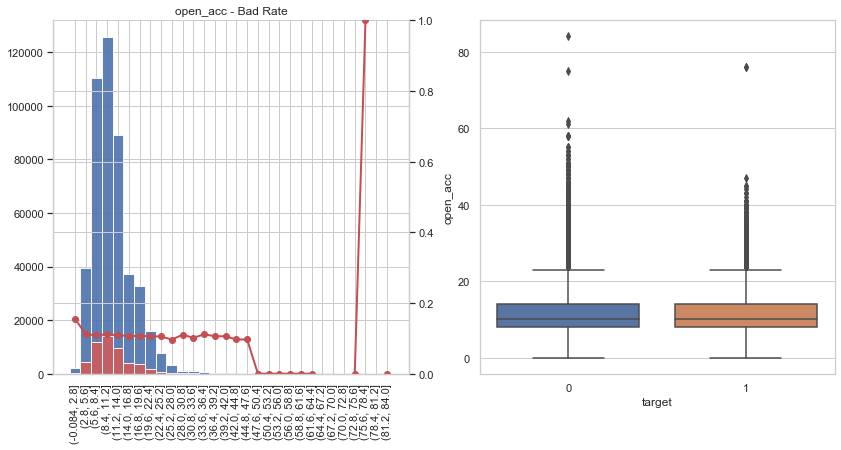

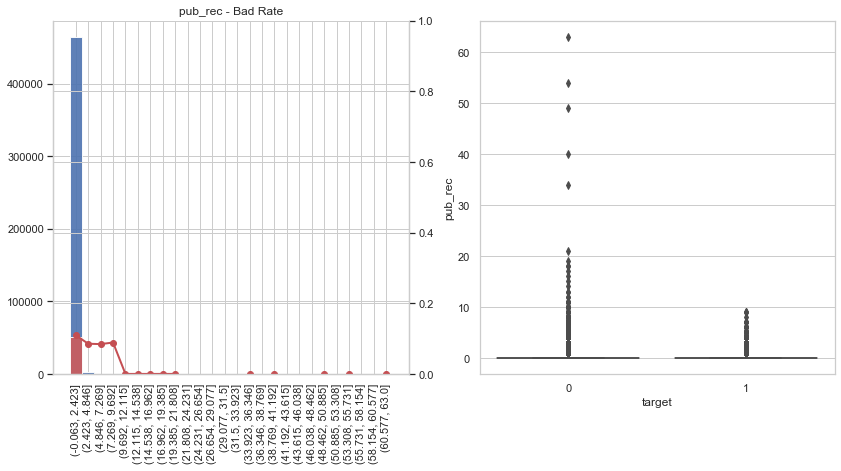

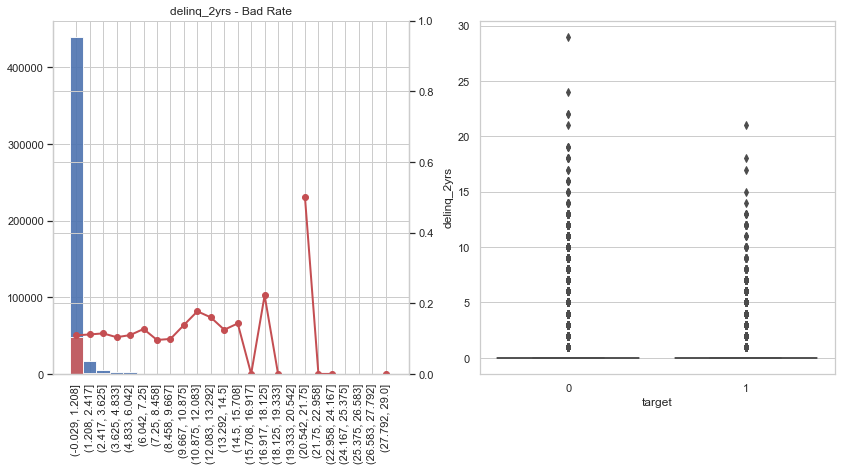

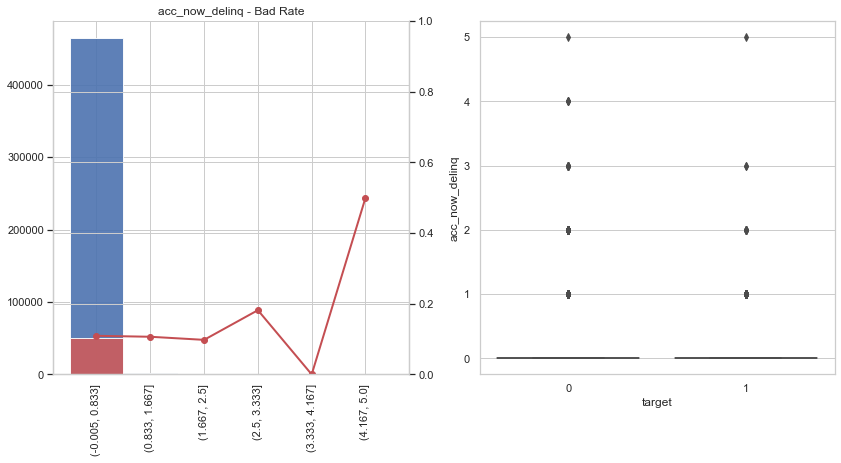

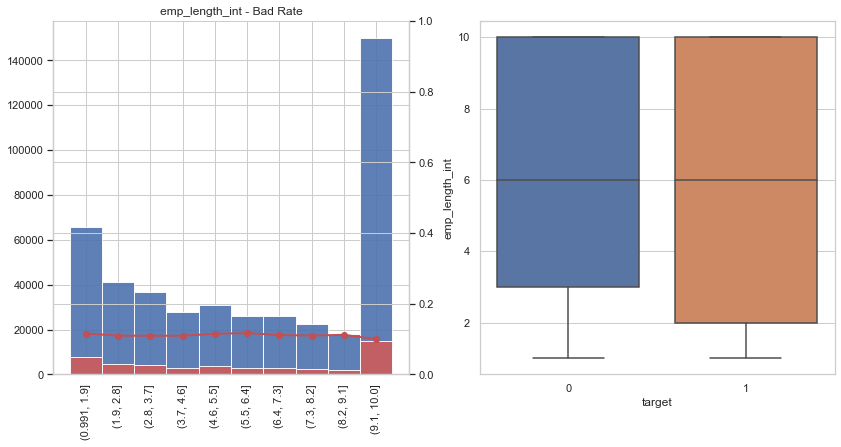

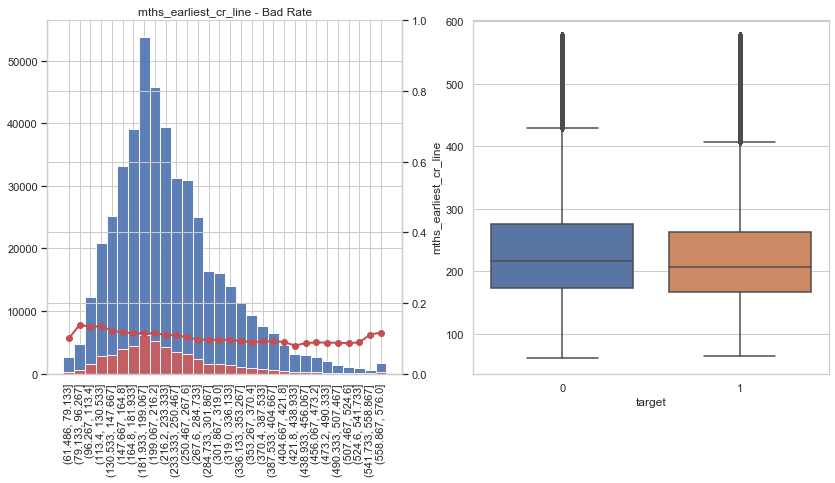

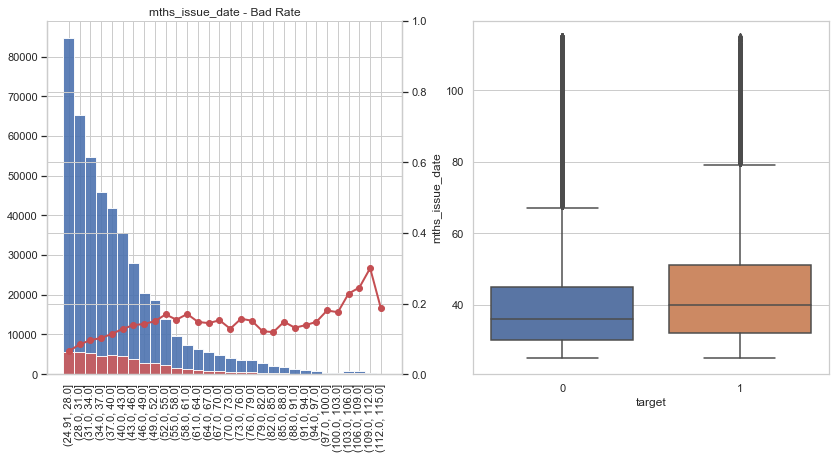

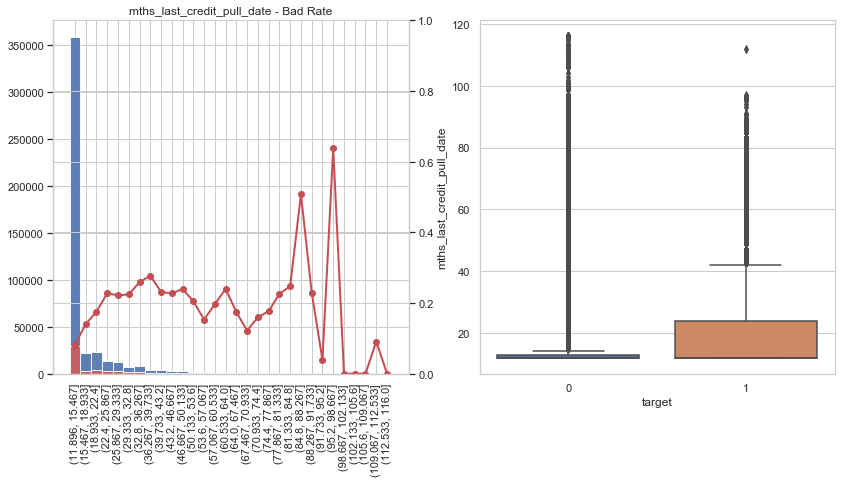

In [44]:
for col in cols_pred_num:
    grouped = plot_bar_univariate_cont(data[col], data['target'], nbins=30)

## Data Preparation 

### WoE

In [45]:
# initialized iv and woe config
woe_config = {}
iv_dict = {}
woe_replacement_cat = {}
woe_replacement_cont = {}

data_woe = pd.DataFrame(index=data.index)

In [46]:
def woe_discrete(X, y):
    X.name = "value"
    dataset = pd.concat([X, y], axis=1)
    target = y.name

    # distinguish NaN and not NaN
    data_notnan = dataset.loc[X.notnull()].copy()
    data_nan = dataset.loc[X.isnull()].copy()
    data_nan.iloc[:, 0] = data_nan.iloc[:, 0].astype(str)
 
    # create
    group_notnan = data_notnan.groupby(X)[target].agg(["count", "sum"]).reset_index()
    group_notnan.iloc[:, 0] = group_notnan.iloc[:, 0].apply(str)
    group_nan = data_nan.groupby([X], as_index=False)[target].agg(["count", "sum"]).reset_index()
    group_nan.iloc[:, 0] = group_nan.iloc[:, 0].apply(str)
    group_notnan["is_null"] = 0
    group_nan["is_null"] = 1

    # union nan and not nan data
    union = pd.concat([group_notnan, group_nan], axis=0, ignore_index=True)
    union.rename(columns={"count": "total", "sum": "bad"}, inplace=True)
    union["good"] = union["total"] - union["bad"]

    total = union["total"].sum()
    total_1 = union["bad"].sum()
    total_0 = union["good"].sum()

    union["dist_bad"] = np.maximum(union["bad"], 0.5) / total_1
    union["dist_good"] = np.maximum(union["good"], 0.5) / total_0
    union["WOE"] = np.log(union["dist_bad"] / union["dist_good"])
    union["pct_share"] = union["total"] / total * 100
    union.iloc[:, 0] = union.iloc[:, 0].astype(str)
    union.sort_values(by=["is_null", "WOE"], inplace=True)
    
    union["IV"] = (union['dist_bad'] - union['dist_good']) * union['WOE']
    iv = np.sum(union["IV"])
    
    union = union[["value", "total", "bad", "good", "dist_bad", "dist_good", "WOE", "pct_share", "is_null"]]
    print("Information Valuie:", iv)
    return union.sort_values(by='WOE'), iv

In [47]:
def get_dict_woe(woe):
    cols_to_replace = {i:j for i, j in zip(woe["value"], woe['WOE'])}
    try:
        cols_to_replace[np.nan] = cols_to_replace.pop('nan')
    except:
        pass
    return cols_to_replace

In [48]:
def plot_woe(woe, **kwargs):
    fig, ax1 = plt.subplots(**kwargs)
    ax1.bar(woe.iloc[:, 0], woe.iloc[:, 1], width=1)
    ax1.bar(woe.iloc[:, 0], woe.iloc[:, 2], width=1, color='indianred')
    ax2 = ax1.twinx()
    ax2.plot(woe.iloc[:, 0], woe.iloc[:, -3], color='k', linestyle='-')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
    plt.show()

In [49]:
def get_category(df, col, binsnum, labels=None, qcut = False):
    if qcut:
        localdf = pd.qcut(df[col], q = binsnum, labels = labels) # quantile cut
    else:
        localdf = pd.cut(df[col], bins = binsnum, labels = labels) # equal-length cut
        
    localdf = pd.DataFrame(localdf)
    name = 'gp' + '_' + col
    localdf[name] = localdf[col]
    df = df.join(localdf[name]) 
    df[name] = df[name].apply(lambda x: str(x.left) + '_to_' + str(x.right))
    return df

#### Categorical Variable

###### Grade

Information Valuie: 0.2944573693974947


value  total   bad   good  dist_bad  dist_good       WOE  pct_share  is_null
0     A  44767  1737  43030  0.056800   0.172679 -1.111901  16.001301        0
1     B  82227  6394  75833  0.209084   0.304318 -0.375337  29.390823        0
2     C  75450  8677  66773  0.283738   0.267960  0.057214  26.968485        0
3     D  46157  7130  39027  0.233151   0.156615  0.397894  16.498136        0
4     E  21221  4119  17102  0.134691   0.068630  0.674252   7.585132        0
5     F   7952  1968   5984  0.064354   0.024014  0.985765   2.842325        0
6     G   1997   556   1441  0.018181   0.005783  1.145512   0.713798        0

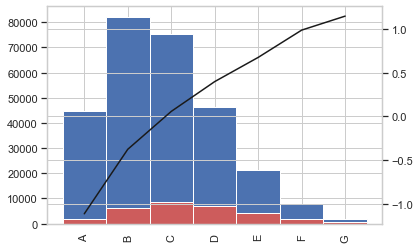

In [50]:
# create woe table
mask_filter = mask_train
woe, iv = woe_discrete(data.loc[mask_filter, 'grade'], data.loc[mask_filter, col_target])

display(woe)
plot_woe(woe)

In [51]:
# get the woe value from each feature
cols_to_replace = get_dict_woe(woe)
woe_config['grade'] = cols_to_replace
iv_dict['grade'] = iv

In [52]:
# transform original value to WoE value
data_woe['grade'] = data['grade'].replace(cols_to_replace)
data_woe['grade'].head()

id
1077501   -0.375337
1077430    0.057214
1077175    0.057214
1076863    0.057214
1075358   -0.375337
Name: grade, dtype: float64

In [53]:
# PRACTICE -- SUB-GRADE
# 1. create WoE table 
# 2. get the WoE dictionary & Store the config
# 3. transform the original value to WoE value and stored in data_woe dataframe

Information Valuie: 0.022310549616816704


value   total    bad    good  dist_bad  dist_good       WOE  pct_share  \
0  MORTGAGE  141492  13536  127956  0.442628   0.513488 -0.148497  50.574220   
3       OWN   25059   2735   22324  0.089435   0.089586 -0.001694   8.956968   
4      RENT  113082  14286   98796  0.467153   0.396469  0.164060  40.419486   
1      NONE      30      4      26  0.000131   0.000104  0.226035   0.010723   
2     OTHER     108     20      88  0.000654   0.000353  0.616232   0.038603   

   is_null  
0        0  
3        0  
4        0  
1        0  
2        0

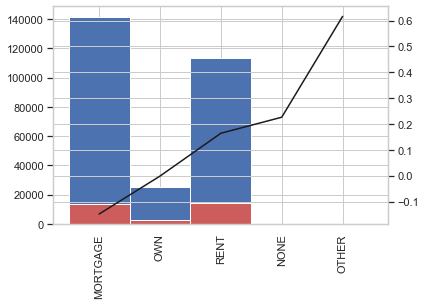

In [54]:
# other case for categorical variable with "COARSING Classing"
mask_filter = mask_train
woe, iv = woe_discrete(data.loc[mask_filter, 'home_ownership'], data.loc[mask_filter, col_target])

display(woe)
plot_woe(woe)

Information Valuie: 0.022210174957485878


value   total    bad    good  dist_bad  dist_good  \
0                        MORTGAGE  141492  13536  127956  0.442628   0.513488   
1                             OWN   25059   2735   22324  0.089435   0.089586   
2  home_ownership:RENT_NONE_OTHER  113220  14310   98910  0.467938   0.396926   

        WOE  pct_share  is_null  
0 -0.148497  50.574220        0  
1 -0.001694   8.956968        0  
2  0.164585  40.468812        0

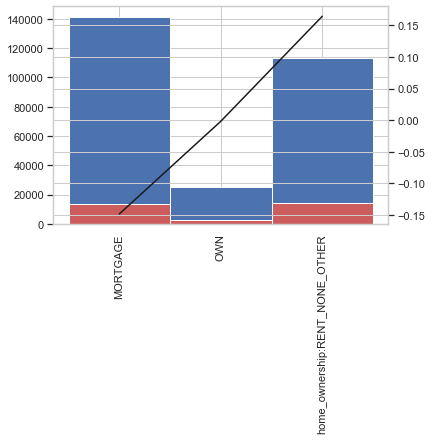

In [55]:
# create a dictionary to merge small share percentage or WoE that have slight difference with it's other group close to them

coarse_dict = {
    'RENT': 'home_ownership:RENT_NONE_OTHER',
    'NONE':'home_ownership:RENT_NONE_OTHER',
    'OTHER':'home_ownership:RENT_NONE_OTHER',
    'ANY':'home_ownership:RENT_NONE_OTHER'
}

woe_replacement_cat['home_ownership'] = coarse_dict 
data['home_ownership'] = data['home_ownership'].replace(coarse_dict)

woe, iv = woe_discrete(data.loc[mask_filter, 'home_ownership'], data.loc[mask_filter, col_target])

display(woe)
plot_woe(woe)

In [56]:
cols_to_replace = get_dict_woe(woe)
woe_config['home_ownership'] = cols_to_replace
iv_dict['home_ownership'] = iv
data_woe['home_ownership'] = data['home_ownership'].replace(cols_to_replace).astype(np.float)
data_woe['home_ownership'].head()

id
1077501    0.164585
1077430    0.164585
1077175    0.164585
1076863    0.164585
1075358    0.164585
Name: home_ownership, dtype: float64

In [57]:
# Practice create coarse classing
# Create coarse classing for "purpose" predictor

#### Continous Variable

In [58]:
def woe_continous(X, y, bins=100):
    X = pd.cut(X, precision=1, bins=bins)
    X.name = "value"
    dataset = pd.concat([X, y], axis=1)
    target = y.name
    
    # distinguish NaN and not NaN
    data_notnan = dataset.loc[X.notnull()].copy()
    data_nan = dataset.loc[X.isnull()].copy()
    data_nan.iloc[:, 0] = data_nan.iloc[:, 0].astype(str)
 
    # create
    group_notnan = data_notnan.groupby(data_notnan.iloc[:, 0])[target].agg(["count", "sum"]).reset_index()
    group_notnan.iloc[:, 0] = group_notnan.iloc[:, 0].apply(lambda x: str(x.left) + '_to_' + str(x.right))
    group_nan = data_nan.groupby(data_nan.iloc[:, 0], as_index=False)[target].agg(["count", "sum"]).reset_index()
    group_nan.iloc[:, 0] = group_nan.iloc[:, 0].apply(str)
    group_notnan["is_null"] = 0
    group_nan["is_null"] = 1

    # union nan and not nan data
    union = pd.concat([group_notnan, group_nan], axis=0, ignore_index=True)
    union.rename(columns={"count": "total", "sum": "bad"}, inplace=True)
    union["good"] = union["total"] - union["bad"]

    total = union["total"].sum()
    total_1 = union["bad"].sum()
    total_0 = union["good"].sum()

    union["dist_bad"] = np.maximum(union["bad"], 0.5) / total_1
    union["dist_good"] = np.maximum(union["good"], 0.5) / total_0
    union["WOE"] = np.log(union["dist_bad"] / union["dist_good"])
    union["pct_share"] = union["total"] / total * 100
    
    union["IV"] = (union['dist_bad'] - union['dist_good']) * union['WOE']
    iv = np.sum(union["IV"])
    
    union = union[["value", "total", "bad", "good", "dist_bad", "dist_good", "WOE", "pct_share", "is_null"]]
    
    print("information value:", iv)
    return union, iv

information value: 0.001984850779413174


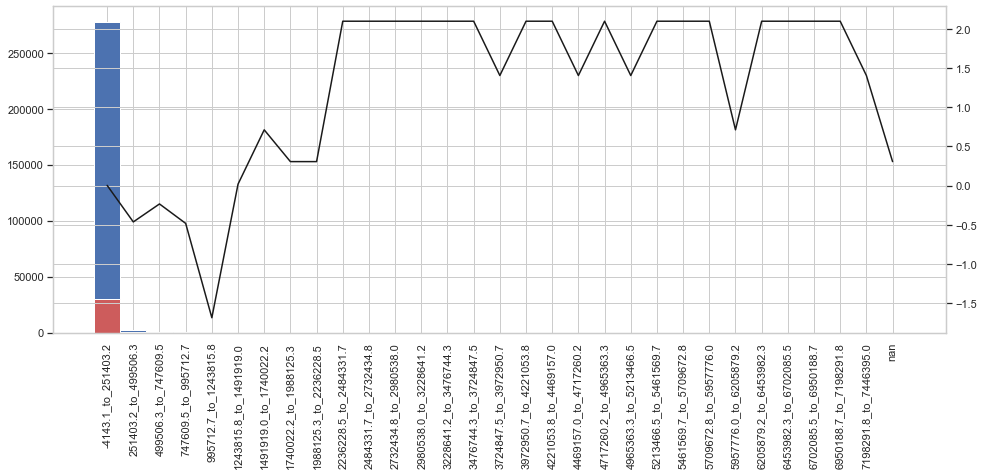

In [59]:
mask_filter = mask_train #& ((data['annual_inc'] < 150000)|(data['annual_inc'].isnull()))
woe, iv = woe_continous(data.loc[mask_filter, 'annual_inc'], data.loc[mask_filter, col_target], bins=30)

plot_woe(woe, figsize=(16,6))

Since annual income have a skew data, first we will have to zoom in on the data first.  
to do that we will have to filter some specific range of annual income

information value: 0.05298025459882262


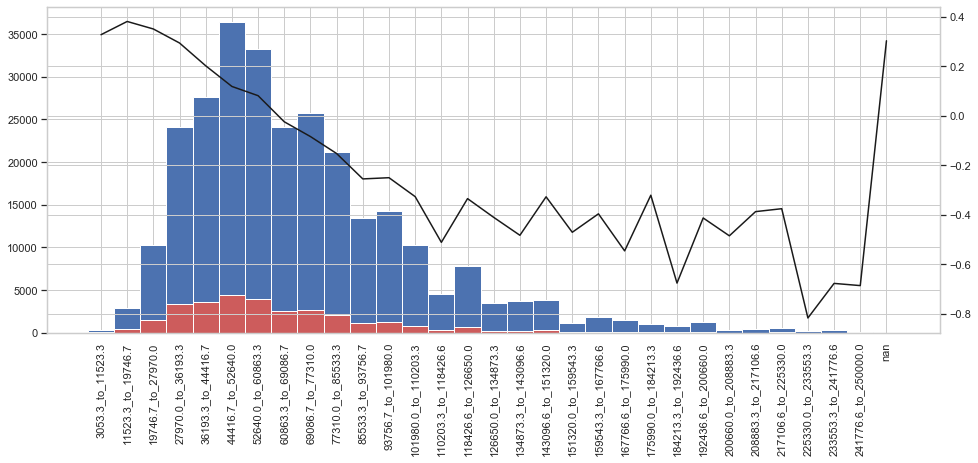

In [60]:
mask_filter = mask_train & ((data['annual_inc'] < 250000)|(data['annual_inc'].isnull()))
woe, iv = woe_continous(data.loc[mask_filter, 'annual_inc'], data.loc[mask_filter, col_target], bins=30)

plot_woe(woe, figsize=(16,6))

information value: 0.053170267071918256


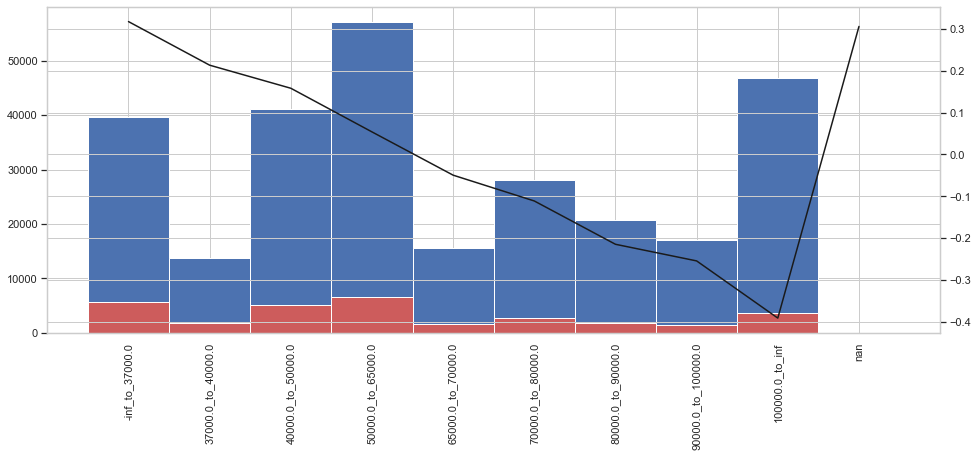

In [61]:
# coarse classing the binning and store it to woe_replacement_cont

bins = [-np.inf, 37000, 40000, 50000, 65000, 70000, 80000, 90000, 100000, np.inf]
woe_replacement_cont['annual_inc'] = bins

woe, iv = woe_continous(data.loc[mask_train, 'annual_inc'], data.loc[mask_train, col_target], bins=bins)
plot_woe(woe, figsize=(16,6))

In [62]:
# transform the data for annual income using the WoE value
# first we also need to create annual_inc_f > factor or binning from annual income that we may need it later
data['annual_inc_f'] = pd.cut(data['annual_inc'], bins=bins).apply(lambda x: str(x.left) + '_to_' + str(x.right))
cols_to_replace = get_dict_woe(woe)

woe_config['annual_inc'] = cols_to_replace
iv_dict['annual_inc'] = iv
data_woe['annual_inc_f'] = data['annual_inc_f'].replace(cols_to_replace)
data[['annual_inc', 'annual_inc_f']].head()

annual_inc        annual_inc_f
id                                     
1077501     24000.0     -inf_to_37000.0
1077430     30000.0     -inf_to_37000.0
1077175     12252.0     -inf_to_37000.0
1076863     49200.0  40000.0_to_50000.0
1075358     80000.0  70000.0_to_80000.0

In [63]:
# Practice, let's do for the int rate


In [64]:
# since the purpose of this notebook is just for training 
# & we don't have much time to convert whole predictor to WoE
# I have created data_woe that ready to use
# let's just use it for now

In [65]:
cols_woe_practice = []

data_woe_practice  = pd.read_csv('data_woe_practice.csv', index_col=0)
data_woe = data_woe.join(data_woe_practice)
data_woe.columns = [col +'_WOE' for col in data_woe.columns]
data_woe.head()

grade_WOE  home_ownership_WOE  annual_inc_f_WOE  sub_grade_WOE  \
id                                                                        
1077501  -0.375337            0.164585          0.317706      -0.525629   
1077430   0.057214            0.164585          0.317706       0.103514   
1077175   0.057214            0.164585          0.317706       0.212617   
1076863   0.057214            0.164585          0.158221      -0.046829   
1075358  -0.375337            0.164585         -0.111451      -0.139090   

         addr_state_WOE  verification_status_WOE  purpose_WOE  int_rate_f_WOE  \
id                                                                              
1077501        0.008054                 0.171536    -0.275633       -0.556783   
1077430       -0.073675                -0.054471    -0.125812        0.158363   
1077175       -0.158897                -0.163059     0.535987        0.158363   
1076863        0.052311                -0.054471     0.255281       -0.147783   
1075358       -0.073675                -0.054471     0.255281       -0.147783   

         total_acc_f_WOE  inq_last_6mths_f_WOE  mths_since_last_delinq_f_WOE  \
id                                                                             
1077501         0.133746             -0.100715                      0.012338   
1077430         0.298939              0.471209                      0.012338   
1077175         0.133746              0.237564                      0.012338   
1076863        -0.082806             -0.100715                     -0.038327   
1075358        -0.082806             -0.100715                     -0.038327   

         delinq_2yrs_f_WOE  dti_f_WOE  revol_util_f_WOE  revol_bal_f_WOE  \
id                                                                         
1077501          -0.003091   0.201728          0.192146         0.016471   
1077430          -0.003091  -0.233105         -0.314357         0.041897   
1077175          -0.003091  -0.233105          0.285140         0.041897   
1076863          -0.003091   0.048871         -0.314357         0.041897   
1075358          -0.003091   0.002054         -0.046002        -0.056426   

         mths_last_credit_pull_date_f_WOE  mths_earliest_cr_line_f_WOE  \
id                                                                       
1077501                          0.626932                    -0.183717   
1077430                          0.626932                     0.021871   
1077175                          0.626932                     0.056551   
1076863                          0.626932                    -0.024940   
1075358                         -1.281254                    -0.024940   

         emp_length_int_f_WOE  installment_f_WOE  open_acc_f_WOE  \
id                                                                 
1077501             -0.046198          -0.049214        0.056058   
1077430              0.048267          -0.049214        0.056058   
1077175             -0.046198          -0.049214        0.056058   
1076863             -0.046198          -0.045737        0.006114   
1075358              0.048267          -0.049214       -0.006787   

         total_rev_hi_lim_f_WOE  mths_issue_date_f_WOE  total_rec_int_f_WOE  \
id                                                                            
1077501                0.404728                0.36557             0.005376   
1077430                0.404728                0.36557             0.152917   
1077175                0.404728                0.36557             0.152917   
1076863                0.404728                0.36557            -0.085264   
1075358                0.404728                0.36557             0.005376   

         pub_rec_f_WOE  funded_amnt_f_WOE  tot_cur_bal_f_WOE  \
id                                                             
1077501       0.004111          -0.049144           0.404728   
1077430       0.004111          -0.049144           0.404728   
1077175       0

### Imputation

In [66]:
data_imp = pd.DataFrame(index=data.index)

In [67]:
# We fill the missing values with the mean value of the non-missing values.
# Always remember when you are trying to transform your data, 
# you can only see to training data then transform to whole dataset
# otherwise you are cheating or looking into the future/unseen data

data_imp['annual_inc_imp'] = data['annual_inc'].fillna(data.loc[mask_train, 'annual_inc'].mean())

In [68]:
# We fill the missing values with zeroes.
data_imp['mths_earliest_cr_line_imp'] = data['mths_earliest_cr_line'].fillna(0)
data_imp['acc_now_delinq_imp'] = data['acc_now_delinq'].fillna(0)
data_imp['total_acc_imp'] = data['total_acc'].fillna(0)
data_imp['pub_rec_imp'] = data['pub_rec'].fillna(0)
data_imp['open_acc_imp'] = data['open_acc'].fillna(0)
data_imp['inq_last_6mths_imp'] = data['inq_last_6mths'].fillna(0)
data_imp['delinq_2yrs_imp'] = data['delinq_2yrs'].fillna(0)
data_imp['emp_length_int_imp'] = data['emp_length_int'].fillna(0)

### Standard Scaler

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data_imp.loc[mask_train])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
import re

data_sc = pd.DataFrame(scaler.transform(data_imp), index=data_imp.index, columns=data_imp.columns)
data_sc.columns = [re.sub('imp', 'sc', col) for col in data_sc.columns]
data_sc.head()

annual_inc_sc  mths_earliest_cr_line_sc  acc_now_delinq_sc  \
id                                                                    
1077501      -0.894974                  1.770256          -0.057929   
1077430      -0.786069                 -0.210913          -0.057929   
1077175      -1.108210                 -0.570072          -0.057929   
1076863      -0.437573                  0.229347          -0.057929   
1075358       0.121472                  0.240933          -0.057929   

         total_acc_sc  pub_rec_sc  open_acc_sc  inq_last_6mths_sc  \
id                                                                  
1077501     -1.386250   -0.325835    -1.642001           0.177430   
1077430     -1.817860   -0.325835    -1.642001           3.840959   
1077175     -1.299928   -0.325835    -1.842463           1.093313   
1076863      1.030767   -0.325835    -0.238768           0.177430   
1075358      1.117089   -0.325835     0.763542          -0.738452   

         delinq_2yrs_sc  emp_length_int_sc  
id                                          
1077501       -0.356446           1.149751  
1077430       -0.356446          -1.321492  
1077175       -0.356446           1.149751  
1076863       -0.356446           1.149751  
1075358       -0.356446          -1.321492

## Merging Feature Engineering Result

In [71]:
data_full = data[[col_target]].join(data_woe)
data_full.head()

target  grade_WOE  home_ownership_WOE  annual_inc_f_WOE  \
id                                                                 
1077501       0  -0.375337            0.164585          0.317706   
1077430       1   0.057214            0.164585          0.317706   
1077175       0   0.057214            0.164585          0.317706   
1076863       0   0.057214            0.164585          0.158221   
1075358       0  -0.375337            0.164585         -0.111451   

         sub_grade_WOE  addr_state_WOE  verification_status_WOE  purpose_WOE  \
id                                                                             
1077501      -0.525629        0.008054                 0.171536    -0.275633   
1077430       0.103514       -0.073675                -0.054471    -0.125812   
1077175       0.212617       -0.158897                -0.163059     0.535987   
1076863      -0.046829        0.052311                -0.054471     0.255281   
1075358      -0.139090       -0.073675                -0.054471     0.255281   

         int_rate_f_WOE  total_acc_f_WOE  inq_last_6mths_f_WOE  \
id                                                               
1077501       -0.556783         0.133746             -0.100715   
1077430        0.158363         0.298939              0.471209   
1077175        0.158363         0.133746              0.237564   
1076863       -0.147783        -0.082806             -0.100715   
1075358       -0.147783        -0.082806             -0.100715   

         mths_since_last_delinq_f_WOE  delinq_2yrs_f_WOE  dti_f_WOE  \
id                                                                    
1077501                      0.012338          -0.003091   0.201728   
1077430                      0.012338          -0.003091  -0.233105   
1077175                      0.012338          -0.003091  -0.233105   
1076863                     -0.038327          -0.003091   0.048871   
1075358                     -0.038327          -0.003091   0.002054   

         revol_util_f_WOE  revol_bal_f_WOE  mths_last_credit_pull_date_f_WOE  \
id                                                                             
1077501          0.192146         0.016471                          0.626932   
1077430         -0.314357         0.041897                          0.626932   
1077175          0.285140         0.041897                          0.626932   
1076863         -0.314357         0.041897                          0.626932   
1075358         -0.046002        -0.056426                         -1.281254   

         mths_earliest_cr_line_f_WOE  emp_length_int_f_WOE  installment_f_WOE  \
id                                                                              
1077501                    -0.183717             -0.046198          -0.049214   
1077430                     0.021871              0.048267          -0.049214   
1077175                     0.056551             -0.046198          -0.049214   
1076863                    -0.024940             -0.046198          -0.045737   
1075358                    -0.024940              0.048267          -0.049214   

         open_acc_f_WOE  total_rev_hi_lim_f_WOE  mths_issue_date_f_WOE  \
id                                                                       
1077501        0.056058                0.404728                0.36557   
1077430        0.056058                0.404728                0.36557   
1077175        0.056058                0.404728                0.36557   
1076863        0.006114                0.404728                0.36557   
1075358       -0.006787                0.404728                0.36557   

         total_rec_int_f_WOE  pub_rec_f_WOE  funded_amnt_f_WOE  \
id                                                               
1077501             0.005376       0.004111          -0.049144   
1077430             0.152917       0.004111          -0.049144   
1077175             0.152917       0.004111          -0.049144   
1076863            -0.085264    

In [72]:
data_full = data_full.join(data_imp)
data_full = data_full.join(data_sc)

data_full.head()

target  grade_WOE  home_ownership_WOE  annual_inc_f_WOE  \
id                                                                 
1077501       0  -0.375337            0.164585          0.317706   
1077430       1   0.057214            0.164585          0.317706   
1077175       0   0.057214            0.164585          0.317706   
1076863       0   0.057214            0.164585          0.158221   
1075358       0  -0.375337            0.164585         -0.111451   

         sub_grade_WOE  addr_state_WOE  verification_status_WOE  purpose_WOE  \
id                                                                             
1077501      -0.525629        0.008054                 0.171536    -0.275633   
1077430       0.103514       -0.073675                -0.054471    -0.125812   
1077175       0.212617       -0.158897                -0.163059     0.535987   
1076863      -0.046829        0.052311                -0.054471     0.255281   
1075358      -0.139090       -0.073675                -0.054471     0.255281   

         int_rate_f_WOE  total_acc_f_WOE  inq_last_6mths_f_WOE  \
id                                                               
1077501       -0.556783         0.133746             -0.100715   
1077430        0.158363         0.298939              0.471209   
1077175        0.158363         0.133746              0.237564   
1076863       -0.147783        -0.082806             -0.100715   
1075358       -0.147783        -0.082806             -0.100715   

         mths_since_last_delinq_f_WOE  delinq_2yrs_f_WOE  dti_f_WOE  \
id                                                                    
1077501                      0.012338          -0.003091   0.201728   
1077430                      0.012338          -0.003091  -0.233105   
1077175                      0.012338          -0.003091  -0.233105   
1076863                     -0.038327          -0.003091   0.048871   
1075358                     -0.038327          -0.003091   0.002054   

         revol_util_f_WOE  revol_bal_f_WOE  mths_last_credit_pull_date_f_WOE  \
id                                                                             
1077501          0.192146         0.016471                          0.626932   
1077430         -0.314357         0.041897                          0.626932   
1077175          0.285140         0.041897                          0.626932   
1076863         -0.314357         0.041897                          0.626932   
1075358         -0.046002        -0.056426                         -1.281254   

         mths_earliest_cr_line_f_WOE  emp_length_int_f_WOE  installment_f_WOE  \
id                                                                              
1077501                    -0.183717             -0.046198          -0.049214   
1077430                     0.021871              0.048267          -0.049214   
1077175                     0.056551             -0.046198          -0.049214   
1076863                    -0.024940             -0.046198          -0.045737   
1075358                    -0.024940              0.048267          -0.049214   

         open_acc_f_WOE  total_rev_hi_lim_f_WOE  mths_issue_date_f_WOE  \
id                                                                       
1077501        0.056058                0.404728                0.36557   
1077430        0.056058                0.404728                0.36557   
1077175        0.056058                0.404728                0.36557   
1076863        0.006114                0.404728                0.36557   
1075358       -0.006787                0.404728                0.36557   

         total_rec_int_f_WOE  pub_rec_f_WOE  funded_amnt_f_WOE  \
id                                                               
1077501             0.005376       0.004111          -0.049144   
1077430             0.152917       0.004111          -0.049144   
1077175             0.152917       0.004111          -0.049144   
1076863            -0.085264    

In [73]:
cols_pred2 = [col for col in data_full.columns if col != col_target]

### Correlation Plot

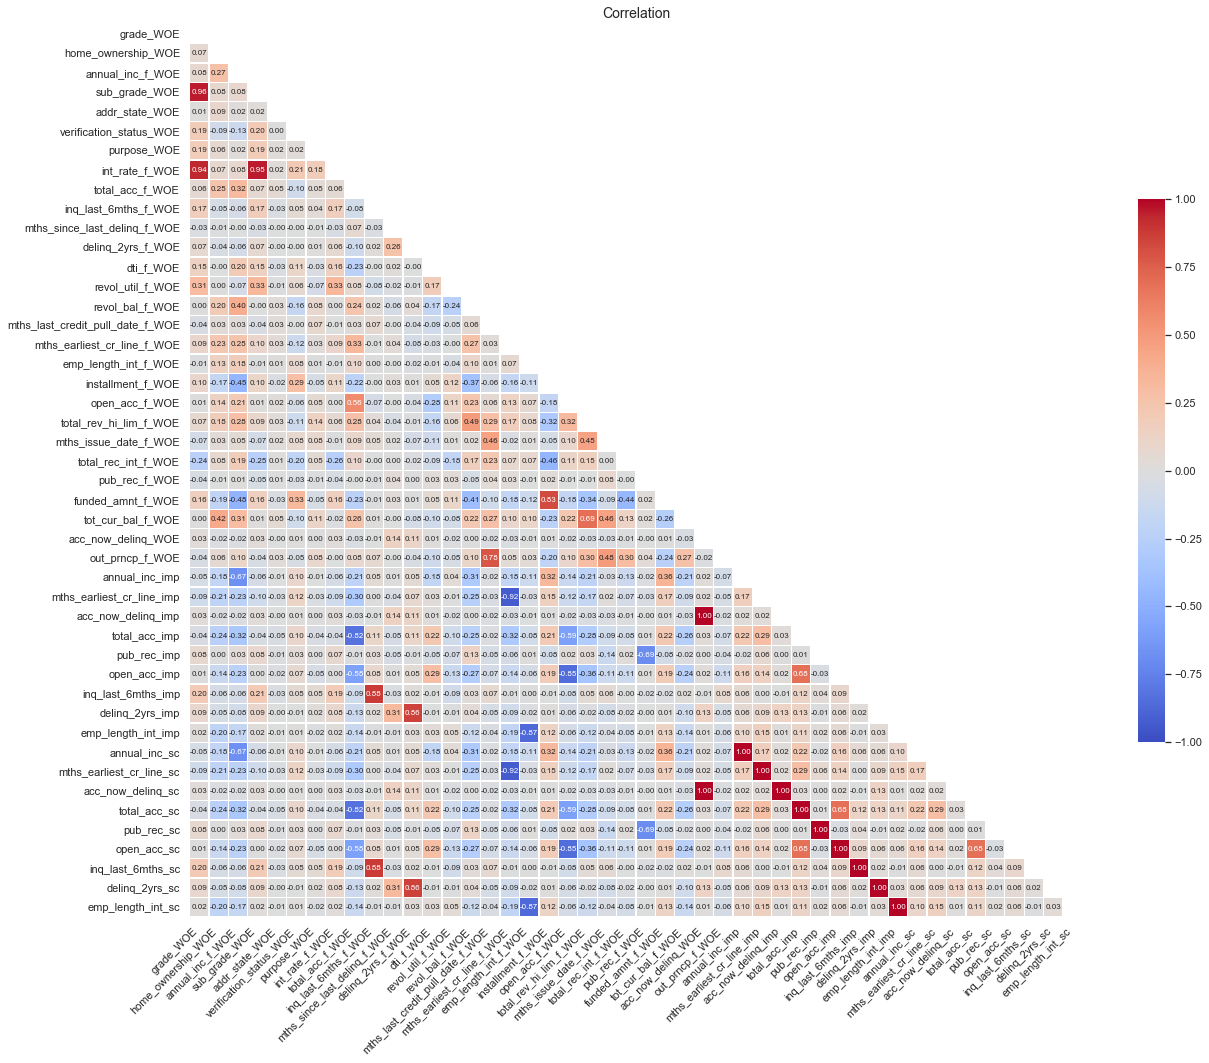

In [97]:
corr = data_full[cols_pred2].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig = plt.figure(figsize=(20, 20))

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    linewidths=0.3,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    cbar_kws={"shrink": .5}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

ax.set_title("Correlation", size=14)

plt.show()

Correlation group: 
* sub_grade, grade, interest rate: it seems lending club using risk based pricing
* inquiry_last_6m_WOE, delinq_last_2yrs
* acc_now_delinq_sc, acc_now_delinq_WOE, acc_now_delinq_imp   

from this correlated group we can refer to univariate gini to choose the best predictor or let stepwise regression choose for us. 

## Feature Selection

### Univariate Gini

In [74]:
import itertools
from sklearn.base import clone
from sklearn.metrics import roc_auc_score

class univariate_gini:
    def __init__(self, model):
        self.model = model
        
        return
    
    def fit(self, X_train, y_train):
        self.columns = X_train.columns
        self.models = [clone(self.model) for i in range(len(self.columns))]
        for i, col in enumerate(self.columns):
            self.models[i].fit(X_train[[col]], y_train)
            
    def get_univariate(self, X_list, y_list, labels):
        self.y_pred_proba = {}
        cols = pd.MultiIndex.from_tuples(list(itertools.product(['gini'], labels)))
        self.univariate_df = pd.DataFrame(index=self.columns, columns=cols)
        
        for X, y, label in zip(X_list, y_list, labels):
            for i, col in enumerate(self.columns):
                self.y_pred_proba[col] = self.models[i].predict_proba(X[[col]])[:, 1]
                self.univariate_df.loc[col, ('gini', label)] = (2 * roc_auc_score(y, self.y_pred_proba[col])) - 1
        
        
        self.univariate_df.sort_values(by=('gini', labels[0]), ascending=False, inplace=True)

#### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(C= 10e5, random_state=42)

uni_var = univariate_gini(logreg)
uni_var.fit(data_full.loc[mask_train, cols_pred2], data_full.loc[mask_train, [col_target]])

In [77]:
uni_var.get_univariate([data_full.loc[mask_train, cols_pred2], 
                        data_full.loc[mask_valid, cols_pred2],
                        data_full.loc[mask_test, cols_pred2]], 
                       [data_full.loc[mask_train, [col_target]], 
                        data_full.loc[mask_valid, [col_target]],
                        data_full.loc[mask_test, [col_target]]], ['train', 'valid', 'test'])
univariate_lr = uni_var.univariate_df
display(univariate_lr)

gini                          
                                       train        valid         test
mths_last_credit_pull_date_f_WOE    0.394243     0.397348       0.3944
int_rate_f_WOE                      0.307055     0.301504     0.302334
sub_grade_WOE                       0.304953     0.300832      0.29719
out_prncp_f_WOE                     0.302596     0.300401     0.300054
grade_WOE                           0.291039     0.286946     0.284616
mths_issue_date_f_WOE               0.157138     0.155936     0.159562
total_rev_hi_lim_f_WOE              0.131779      0.12838     0.135296
annual_inc_imp                      0.130788     0.134195       0.1387
annual_inc_sc                       0.130788     0.134195       0.1387
annual_inc_f_WOE                    0.129984     0.131427     0.135733
tot_cur_bal_f_WOE                   0.128136     0.125367     0.130539
inq_last_6mths_sc                   0.114576     0.124249     0.117487
inq_last_6mths_imp                  0.114576     0.124249     0.117487
revol_util_f_WOE                   0.0932806    0.0847274    0.0897393
dti_f_WOE                          0.0917209    0.0927812    0.0889639
purpose_WOE                        0.0904681    0.0865839    0.0888303
inq_last_6mths_f_WOE                0.080121    0.0854916    0.0778439
home_ownership_WOE                 0.0772818    0.0767396    0.0708687
verification_status_WOE            0.0761288    0.0851761    0.0734951
total_rec_int_f_WOE                0.0717669    0.0668811    0.0698814
mths_earliest_cr_line_imp          0.0658737     0.072512    0.0626685
mths_earliest_cr_line_sc           0.0658737     0.072512    0.0626685
mths_earliest_cr_line_f_WOE        0.0639736    0.0700994    0.0593369
addr_state_WOE                     0.0565316    0.0548125     0.063272
total_acc_sc                       0.0462616    0.0492603    0.0423112
total_acc_imp                      0.0462616    0.0492603    0.0423112
total_acc_f_WOE                    0.0452852    0.0444178    0.0403793
emp_length_int_imp                 0.0382917    0.0418062    0.0396604
emp_length_int_sc                  0.0382917    0.0418062    0.0396604
revol_bal_f_WOE                    0.0311074    0.0288036     0.038994
emp_length_int_f_WOE               0.0284149    0.0337981    0.0304426
installment_f_WOE                  0.0244899    0.0272319    0.0203767
funded_amnt_f_WOE                   0.023843    0.0234345    0.0153441
mths_since_last_delinq_f_WOE       0.0149749   0.00404579    0.0167707
open_acc_imp                        0.011751   0.00934359   0.00361843
open_acc_sc                         0.011751   0.00934359   0.00361843
open_acc_f_WOE                     0.0112796    0.0033263   0.00696656
pub_rec_sc                        0.00984588   0.00630347   0.00586692
pub_rec_imp                       0.00984588   0.00630347   0.00586692
pub_rec_f_WOE                     0.00405402   0.00184571   0.00142647
delinq_2yrs_f_WOE                 0.00293798  -0.00311683   0.00219882
delinq_2yrs_imp                   0.00130991  -0.00513954   -0.0015841
delinq_2yrs_sc                    0.00130991  -0.00513954   -0.0015841
acc_now_delinq_sc                 -0.0001111 -0.000479625  0.000337397
acc_now_delinq_imp                -0.0001111 -0.000479625  0.000337397
acc_now_delinq_WOE                -0.0001111 -0.000479625  0.000337397

#### XGBOOST

### Stepwise Selection

#### Logistic Regression

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.evaluate import PredefinedHoldoutSplit

lr = LogisticRegression(C=10e5, n_jobs=-1, random_state=42)

sfs1 = SFS(lr, 
           k_features=(10, 25), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

In [82]:
sfs1.fit(data_full.loc[mask_train, cols_pred2], data_full.loc[mask_train, [col_target]])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:   31.7s finished

[2020-10-03 15:09:23] Features: 1/25 -- score: 0.6958969531987117[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   39.4s finished

[2020-10-03 15:10:03] Features: 2/25 -- score: 0.7743097696582408[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:   49.1s finished

[2020-10-03 15:10:52] Features: 3/25 -- score: 0.7791818952879431[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(clone_estimator=True, cv=3,
                          estimator=LogisticRegression(C=1000000.0,
                                                       class_weight=None,
                                                       dual=False,
                                                       fit_intercept=True,
                                                       intercept_scaling=1,
                                                       l1_ratio=None,
                                                       max_iter=100,
                                                       multi_class='auto',
                                                       n_jobs=-1, penalty='l2',
                                                       random_state=42,
                                                       solver='lbfgs',
                                                       tol=0.0001, verbose=0,
                                                       warm_start=False

In [85]:
sfs_features = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
sfs_features

feature_idx  \
1                                               (15,)   
2                                             (3, 15)   
3                                          (2, 3, 15)   
4                                      (2, 3, 15, 24)   
5                                  (2, 3, 15, 22, 24)   
6                              (2, 3, 12, 15, 22, 24)   
7                           (2, 3, 4, 12, 15, 22, 24)   
8                       (2, 3, 4, 12, 15, 22, 24, 43)   
9                   (2, 3, 4, 12, 15, 22, 24, 25, 43)   
10               (2, 3, 4, 6, 12, 15, 22, 24, 25, 43)   
11           (2, 3, 4, 6, 12, 13, 15, 22, 24, 25, 43)   
12       (2, 3, 4, 6, 10, 12, 13, 15, 22, 24, 25, 43)   
13   (2, 3, 4, 6, 10, 12, 13, 15, 19, 22, 24, 25, 43)   
14  (2, 3, 4, 6, 10, 12, 13, 15, 19, 22, 24, 25, 4...   
15  (2, 3, 4, 6, 10, 12, 13, 15, 19, 22, 24, 25, 4...   
16  (2, 3, 4, 6, 10, 12, 13, 15, 19, 22, 24, 25, 4...   
17  (2, 3, 4, 6, 10, 12, 13, 15, 17, 19, 22, 24, 2...   
18  (2, 3, 4, 6, 10, 12, 13, 15, 17, 18, 19, 22, 2...   
19  (2, 3, 4, 6, 10, 12, 13, 15, 17, 18, 19, 20, 2...   
20  (2, 3, 4, 6, 10, 12, 13, 15, 17, 18, 19, 20, 2...   
21  (2, 3, 4, 6, 10, 12, 13, 15, 17, 18, 19, 20, 2...   
22  (2, 3, 4, 6, 10, 12, 13, 15, 17, 18, 19, 20, 2...   
23  (2, 3, 4, 6, 8, 10, 12, 13, 15, 17, 18, 19, 20...   
24  (2, 3, 4, 6, 8, 10, 12, 13, 15, 17, 18, 19, 20...   
25  (0, 2, 3, 4, 6, 8, 10, 12, 13, 15, 17, 18, 19,...   

                                            cv_scores avg_score  \
1   [0.6556221386122911, 0.7102475143904791, 0.721...  0.695897   
2   [0.7460132948965066, 0.7891538508780045, 0.787...   0.77431   
3   [0.7541260631905732, 0.7914020870637839, 0.792...  0.779182   
4   [0.7556848214937595, 0.7929852747197135, 0.793...  0.780588   
5   [0.7596059964480764, 0.7946369653526848, 0.793...  0.782699   
6   [0.7602591855499559, 0.7947210893397747, 0.795...  0.783534   
7   [0.7612053413376859, 0.7956952979361458, 0.796...  0.784355   
8   [0.7636242190936915, 0.7970344479067494, 0.795...  0.785234   
9   [0.7644133570495486, 0.7969669948335354, 0.795...  0.785683   
10  [0.764918207011686, 0.7972708085393938, 0.7956...  0.785942   
11  [0.7655065574959952, 0.7978223292795023, 0.795...  0.786252   
12  [0.7658708186692018, 0.7981801829171502, 0.795...  0.786513   
13  [0.7660130155200999, 0.7982978122996864, 0.795...  0.786664   
14  [0.7659007830703122, 0.7986973827853295, 0.795...  0.786778   
15  [0.7659042448621788, 0.7987881173873544, 0.795...  0.786872   
16  [0.7659555061926792, 0.7988454652838483, 0.796...  0.786947   
17  [0.7658849439847353, 0.7987629350484071, 0.796...  0.786942   
18  [0.7656305642900741, 0.7989742834052668, 0.796...  0.786973   
19  [0.7656287359537353, 0.798965937319381, 0.7963...  0.786966   
20  [0.7656016664184947, 0.7990066839806556, 0.796...  0.786966   
21  [0.7656132458819747, 0.7989241868130516, 0.796...  0.786959   
22  [0.7656121214787484, 0.798943317737809, 0.7963...  0.786952   
23  [0.7655007665831594, 0.7990501776343979, 0.796...   0.78695   
24  [0.7656165033442632, 0.7989443664606428, 0.796...  0.786928   
25  [0.7655842523416334, 0.7989889879638293, 0.796...  0.786947   

                                        feature_names   ci_bound    std_dev  \
1                 (mths_last_credit_pull_date_f_WOE,)  0.0649623  0.0288679   
2   (sub_grade_WOE, mths_last_credit_pull_date_f_WOE)  0.0450442  0.0200167   
3   (annual_inc_f_WOE, sub_grade_WOE, mths_last_cr...  0.0398734  0.0177189   
4   (annual_inc_f_WOE, sub_grade_WOE, mths_last_cr...  0.0396263  0.0176091   
5   (annual_inc_f_WOE, sub_grade_WOE, mths_last_cr...  0.0367538  0.0163326   
6   (annual_inc_f_WOE, sub_grade_WOE, dti_f_WOE, m...  0.0370443  0.0164617   
7   (annual_inc_f_WOE, sub_grade_WOE, addr_state_W...  0.0368385  0.0163703   
8   (annual_inc_f_WOE, sub_grade_WOE, addr_state_W...  0.0344345   0.015302   
9   (annual_inc_f_WOE, sub_grade_WOE, addr_state_W...  0.0338655  0.0150491   
10  (annual_inc_f_WOE, sub

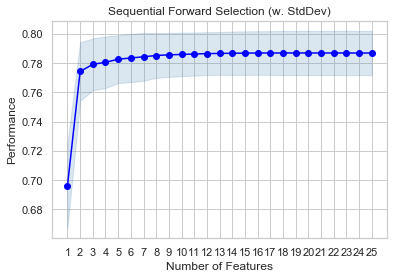

In [86]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid(True)
plt.show()

In [138]:
final_pred_lr = list(sfs_features.loc[16]['feature_names'])

print(final_pred_lr)

['annual_inc_f_WOE', 'sub_grade_WOE', 'addr_state_WOE', 'purpose_WOE', 'mths_since_last_delinq_f_WOE', 'dti_f_WOE', 'revol_util_f_WOE', 'mths_last_credit_pull_date_f_WOE', 'open_acc_f_WOE', 'total_rec_int_f_WOE', 'funded_amnt_f_WOE', 'tot_cur_bal_f_WOE', 'total_acc_sc', 'pub_rec_sc', 'open_acc_sc', 'inq_last_6mths_sc']


#### XGBOOST Model

In [95]:
# you can try stepwise feature selection on xgboost model

### Embeded Feature Selection

In [106]:
import xgboost as xgb

param_dist = {
    'n_estimators': 100,
    'objective':'binary:logistic', 
    'max_depth': 3,
    'learning_rate': 0.05, 
    'n_jobs': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'random_state': 42,
    'num_boost_round': 1000,
    'early_stopping_rounds': 50,
    'eval_metric': 'auc'
}

clf = xgb.XGBClassifier(**param_dist)

In [107]:
eval_set = [
    (data_full.loc[mask_train, cols_pred2], data_full.loc[mask_train, col_target]), # train
    (data_full.loc[mask_valid, cols_pred2], data_full.loc[mask_valid, col_target])
]

clf.fit(data_full.loc[mask_train, cols_pred2], data_full.loc[mask_train, col_target],
        eval_set=eval_set,
        eval_metric='auc',
        verbose=True)

[0]	validation_0-auc:0.76885	validation_1-auc:0.76949
[1]	validation_0-auc:0.77446	validation_1-auc:0.77491
[2]	validation_0-auc:0.77557	validation_1-auc:0.77556
[3]	validation_0-auc:0.77773	validation_1-auc:0.77763
[4]	validation_0-auc:0.77838	validation_1-auc:0.77806
[5]	validation_0-auc:0.77841	validation_1-auc:0.77803
[6]	validation_0-auc:0.78002	validation_1-auc:0.77961
[7]	validation_0-auc:0.78013	validation_1-auc:0.77977
[8]	validation_0-auc:0.77876	validation_1-auc:0.77789
[9]	validation_0-auc:0.77897	validation_1-auc:0.77820
[10]	validation_0-auc:0.77999	validation_1-auc:0.77944
[11]	validation_0-auc:0.78022	validation_1-auc:0.77977
[12]	validation_0-auc:0.77951	validation_1-auc:0.77876
[13]	validation_0-auc:0.77995	validation_1-auc:0.77932
[14]	validation_0-auc:0.78023	validation_1-auc:0.77978
[15]	validation_0-auc:0.77960	validation_1-auc:0.77897
[16]	validation_0-auc:0.78002	validation_1-auc:0.77952
[17]	validation_0-auc:0.78041	validation_1-auc:0.77982
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=50, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_boost_round=1000,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

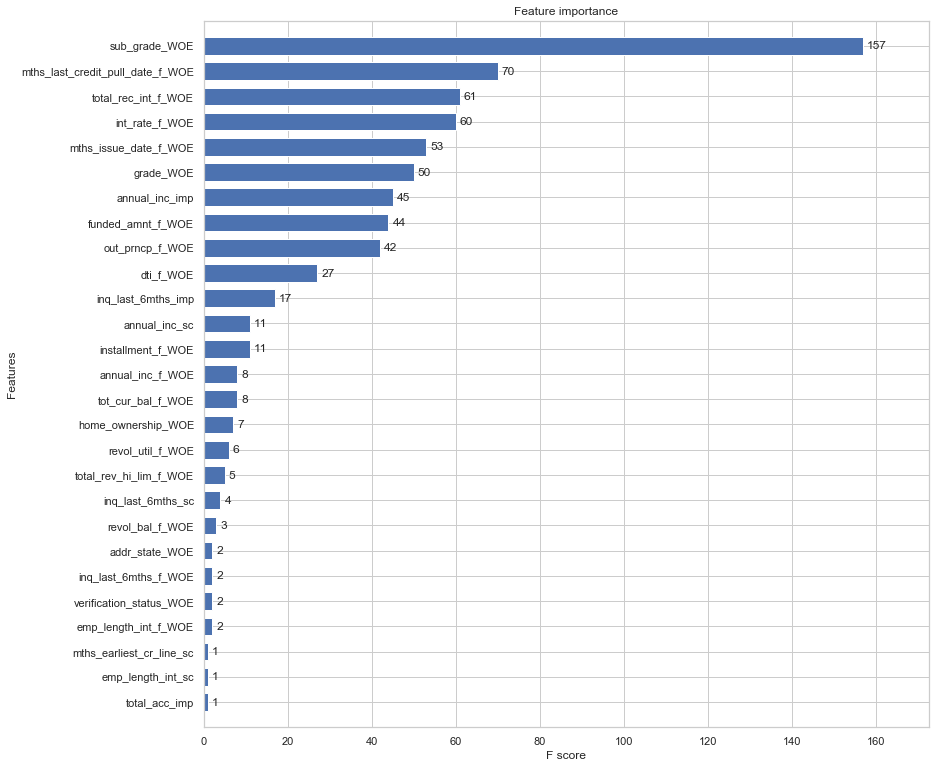

In [110]:
fig, ax = plt.subplots(figsize=(13, 13))
xgb.plot_importance(clf, ax=ax, height=0.7)
plt.show()

In [126]:
clf.importance_type

'gain'

In [129]:
var_imp = pd.DataFrame.from_dict(clf.get_booster().get_fscore(), orient='index', columns=['gain'])\
                      .sort_values("gain", ascending=False)
var_imp

gain
sub_grade_WOE                      157
mths_last_credit_pull_date_f_WOE    70
total_rec_int_f_WOE                 61
int_rate_f_WOE                      60
mths_issue_date_f_WOE               53
grade_WOE                           50
annual_inc_imp                      45
funded_amnt_f_WOE                   44
out_prncp_f_WOE                     42
dti_f_WOE                           27
inq_last_6mths_imp                  17
installment_f_WOE                   11
annual_inc_sc                       11
tot_cur_bal_f_WOE                    8
annual_inc_f_WOE                     8
home_ownership_WOE                   7
revol_util_f_WOE                     6
total_rev_hi_lim_f_WOE               5
inq_last_6mths_sc                    4
revol_bal_f_WOE                      3
emp_length_int_f_WOE                 2
verification_status_WOE              2
inq_last_6mths_f_WOE                 2
addr_state_WOE                       2
total_acc_imp                        1
emp_length_int_sc                    1
mths_earliest_cr_line_sc             1

In [134]:
final_pred_lgb = var_imp.index[:24]

In [135]:
print(final_pred_lgb)

Index(['sub_grade_WOE', 'mths_last_credit_pull_date_f_WOE',
       'total_rec_int_f_WOE', 'int_rate_f_WOE', 'mths_issue_date_f_WOE',
       'grade_WOE', 'annual_inc_imp', 'funded_amnt_f_WOE', 'out_prncp_f_WOE',
       'dti_f_WOE', 'inq_last_6mths_imp', 'installment_f_WOE', 'annual_inc_sc',
       'tot_cur_bal_f_WOE', 'annual_inc_f_WOE', 'home_ownership_WOE',
       'revol_util_f_WOE', 'total_rev_hi_lim_f_WOE', 'inq_last_6mths_sc',
       'revol_bal_f_WOE', 'emp_length_int_f_WOE', 'verification_status_WOE',
       'inq_last_6mths_f_WOE', 'addr_state_WOE'],
      dtype='object')


## Modeling

### Final Model Logistic Regression

In [142]:
lr = LogisticRegression(C=10e5, random_state=42)

In [143]:
lr.fit(data_full.loc[mask_train, final_pred_lr], 
       data_full.loc[mask_train, [col_target]])

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
import pickle 

filename = 'LRModel.pickle'

with open(filename, 'wb') as fin:
    pickle.dump(lr, fin)

In [146]:
# load model
filename = 'LRModel.pickle'

with open(filename, 'rb') as fout:
    lr_model = pickle.load(fout)

In [144]:
# get predictions
col_score_lr = "SCORE_LR"
data_full[col_score_lr] = lr.predict_proba(data_full[final_pred_lr])[:, 1]

### Final Model XGBoost

In [147]:
import xgboost as xgb

param_dist = {
    'n_estimators': 100,
    'objective':'binary:logistic', 
    'max_depth': 3,
    'learning_rate': 0.05, 
    'n_jobs': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.7,
    'random_state': 42,
    'num_boost_round': 1000,
    'early_stopping_rounds': 50,
    'eval_metric': 'auc'
}

clf = xgb.XGBClassifier(**param_dist)

In [148]:
eval_set = [
    (data_full.loc[mask_train, final_pred_lgb], data_full.loc[mask_train, col_target]), # train
    (data_full.loc[mask_valid, final_pred_lgb], data_full.loc[mask_valid, col_target])
]

clf.fit(data_full.loc[mask_train, final_pred_lgb], data_full.loc[mask_train, col_target],
        eval_set=eval_set,
        eval_metric='auc',
        verbose=True)

[0]	validation_0-auc:0.76885	validation_1-auc:0.76949
[1]	validation_0-auc:0.77226	validation_1-auc:0.77268
[2]	validation_0-auc:0.77356	validation_1-auc:0.77381
[3]	validation_0-auc:0.77521	validation_1-auc:0.77543
[4]	validation_0-auc:0.77511	validation_1-auc:0.77536
[5]	validation_0-auc:0.77582	validation_1-auc:0.77577
[6]	validation_0-auc:0.77598	validation_1-auc:0.77587
[7]	validation_0-auc:0.77616	validation_1-auc:0.77607
[8]	validation_0-auc:0.77624	validation_1-auc:0.77615
[9]	validation_0-auc:0.77790	validation_1-auc:0.77793
[10]	validation_0-auc:0.77873	validation_1-auc:0.77890
[11]	validation_0-auc:0.77931	validation_1-auc:0.77945
[12]	validation_0-auc:0.78072	validation_1-auc:0.78089
[13]	validation_0-auc:0.78159	validation_1-auc:0.78145
[14]	validation_0-auc:0.78161	validation_1-auc:0.78151
[15]	validation_0-auc:0.78147	validation_1-auc:0.78134
[16]	validation_0-auc:0.78077	validation_1-auc:0.78044
[17]	validation_0-auc:0.78106	validation_1-auc:0.78074
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=50, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_boost_round=1000,
              num_parallel_tree=1, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [149]:
import pickle 

filename = 'XGBModel.pickle'

with open(filename, 'wb') as fin:
    pickle.dump(clf, fin)

In [150]:
# load model
filename = 'XGBModel.pickle'

with open(filename, 'rb') as fout:
    xgb_model = pickle.load(fout)

In [152]:
col_score_lgb = "SCORE_LGB"

data_full[col_score_lgb] = clf.predict_proba(data_full[final_pred_lgb])[:, 1]

## Evaluation

In [151]:
# https://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def get_optimal_cutoff(tpr, fpr, thresholds):
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({
        'fpr' : pd.Series(fpr, index=i),
        'tpr' : pd.Series(tpr, index = i), 
        '1-fpr' : pd.Series(1-fpr, index = i), 
        'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    print(roc.iloc[[(roc.tf-0).abs().argmin()]])

    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    _ = plt.plot(roc['tpr'])
    _ = plt.plot(roc['1-fpr'], color = 'red')
    _ = plt.xlabel('1-False Positive Rate')
    _ = plt.ylabel('True Positive Rate')
    _ = plt.title('Receiver operating characteristic')
    _ = ax.set_xticklabels([])
    
    
def plot_roc_auc(tpr, fpr, labels):
    
    if (isinstance(tpr, (list, np.array)) and isinstance(fpr, (list, np.array))):
        
        nlist = len(tpr)
        
        if all(len(val) == nlist for val in [tpr, fpr, labels]):
            pass
        else:
            raise ValueError('length of parameter should be the same')
               
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        
        for i in range(nlist):
        
            roc_auc = auc(fpr[i], tpr[i])
            _ = ax.plot(
                fpr[i], 
                tpr[i], 
                label=f'ROC curve {labels[i]} (area = {roc_auc: 0.2f}'
            )
        
        _ = fig.legend(loc="right")
        
    else:
        roc_auc = auc(fpr, tpr)
        
        fig, ax = plt.subplots(figsize=(8, 6.5))
        _ = sns.despine(ax=ax)
        _ = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
        _ = ax.set_xlim([0.0, 1.0])
        _ = ax.set_ylim([0.0, 1.05])
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver operating characteristic example')
        _ = ax.plot(
            fpr, 
            tpr, 
            label=f'ROC curve {labels} (area = {roc_auc: 0.2f}'
        )
        
    _ = fig.legend(loc="right")

### LR Evaluation

In [163]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(data_full.loc[mask_train, [col_target]], 
                                                  data_full.loc[mask_train, [col_score_lr]])
fpr_valid, tpr_valid, thresholds_valid =roc_curve(data_full.loc[mask_valid, [col_target]], 
                                                  data_full.loc[mask_valid, [col_score_lr]])
fpr_test, tpr_test, thresholds_test =roc_curve(data_full.loc[mask_test, [col_target]], 
                                               data_full.loc[mask_test, [col_score_lr]])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_valid = auc(fpr_valid, tpr_valid)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC VALID", roc_auc_valid)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.7884594480872942
ROC-AUC VALID 0.7881369558374146
ROC-AUC TEST 0.7859306192752817


           fpr       tpr    1-fpr        tf  thresholds
10574  0.27803  0.721895  0.72197 -0.000075    0.125681


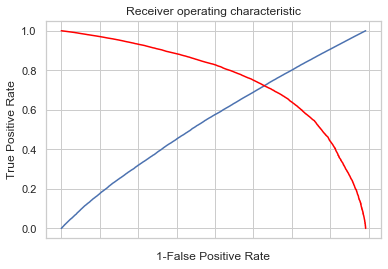

In [164]:
tpr = tpr_valid
fpr = fpr_valid

thresholds = thresholds_valid
get_optimal_cutoff(tpr, fpr, thresholds)

In [165]:
threshold = 0.125681

y_pred_train_t = np.where(data_full.loc[mask_train, col_score_lr] > threshold, 1, 0)
y_pred_valid_t = np.where(data_full.loc[mask_valid, col_score_lr]> threshold, 1, 0)
y_pred_test_t = np.where(data_full.loc[mask_test, col_score_lr]> threshold, 1, 0)

print(classification_report(data_full.loc[mask_valid, col_target], 
                            y_pred_valid_t))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82     83063
           1       0.24      0.72      0.36     10194

    accuracy                           0.72     93257
   macro avg       0.60      0.72      0.59     93257
weighted avg       0.88      0.72      0.77     93257



In [176]:
pd.DataFrame(list(zip(final_pred_lr, lr.coef_[0])), columns=['feature', 'coef'])\
            .sort_values('coef', ascending=False)

feature      coef
10                 funded_amnt_f_WOE  5.127721
4       mths_since_last_delinq_f_WOE  1.569097
0                   annual_inc_f_WOE  1.227514
9                total_rec_int_f_WOE  1.048010
7   mths_last_credit_pull_date_f_WOE  1.041363
1                      sub_grade_WOE  0.977893
2                     addr_state_WOE  0.856357
5                          dti_f_WOE  0.768456
6                   revol_util_f_WOE  0.438758
3                        purpose_WOE  0.282806
11                 tot_cur_bal_f_WOE  0.152638
15                 inq_last_6mths_sc  0.110247
14                       open_acc_sc  0.058189
13                        pub_rec_sc -0.019550
12                      total_acc_sc -0.075758
8                     open_acc_f_WOE -1.300591

### XGB Evaluation

In [157]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report

fpr_train, tpr_train, thresholds_train =roc_curve(data_full.loc[mask_train, [col_target]], 
                                                  data_full.loc[mask_train, [col_score_lgb]])
fpr_valid, tpr_valid, thresholds_valid =roc_curve(data_full.loc[mask_valid, [col_target]], 
                                                  data_full.loc[mask_valid, [col_score_lgb]])
fpr_test, tpr_test, thresholds_test =roc_curve(data_full.loc[mask_test, [col_target]], 
                                               data_full.loc[mask_test, [col_score_lgb]])

roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_valid = auc(fpr_valid, tpr_valid)
roc_auc_test = auc(fpr_test, tpr_test)

print("ROC-AUC TRAIN", roc_auc_train)
print("ROC-AUC VALID", roc_auc_valid)
print("ROC-AUC TEST", roc_auc_test)

ROC-AUC TRAIN 0.7923269710463713
ROC-AUC VALID 0.7920786987076719
ROC-AUC TEST 0.7895256836326736


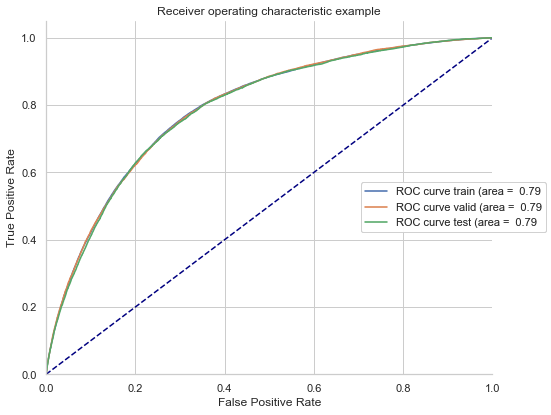

In [158]:
plot_roc_auc([tpr_train, tpr_valid, tpr_test], [fpr_train, fpr_valid, fpr_test], ["train", "valid", "test"])

            fpr       tpr     1-fpr        tf  thresholds
11878  0.274623  0.725329  0.725377 -0.000048    0.133735


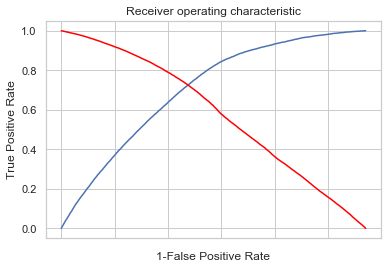

In [159]:
tpr = tpr_valid
fpr = fpr_valid

thresholds = thresholds_valid
get_optimal_cutoff(tpr, fpr, thresholds)

In [162]:
threshold = 0.133735

y_pred_train_t = np.where(data_full.loc[mask_train, col_score_lgb] > threshold, 1, 0)
y_pred_valid_t = np.where(data_full.loc[mask_valid, col_score_lgb]> threshold, 1, 0)
y_pred_test_t = np.where(data_full.loc[mask_test, col_score_lgb]> threshold, 1, 0)

print(classification_report(data_full.loc[mask_valid, col_target], 
                            y_pred_valid_t))

              precision    recall  f1-score   support

           0       0.96      0.73      0.82     83063
           1       0.24      0.73      0.37     10194

    accuracy                           0.73     93257
   macro avg       0.60      0.73      0.60     93257
weighted avg       0.88      0.73      0.77     93257



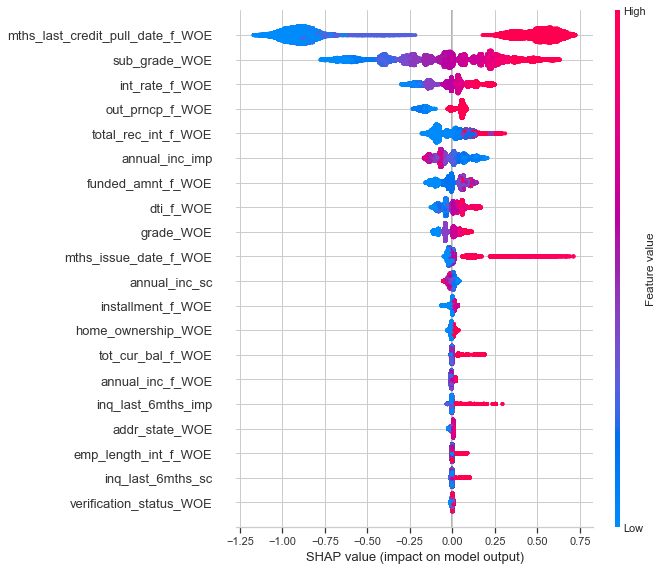

In [180]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_full.loc[mask_valid, final_pred_lgb])

shap.summary_plot(shap_values, data_full.loc[mask_valid, final_pred_lgb])

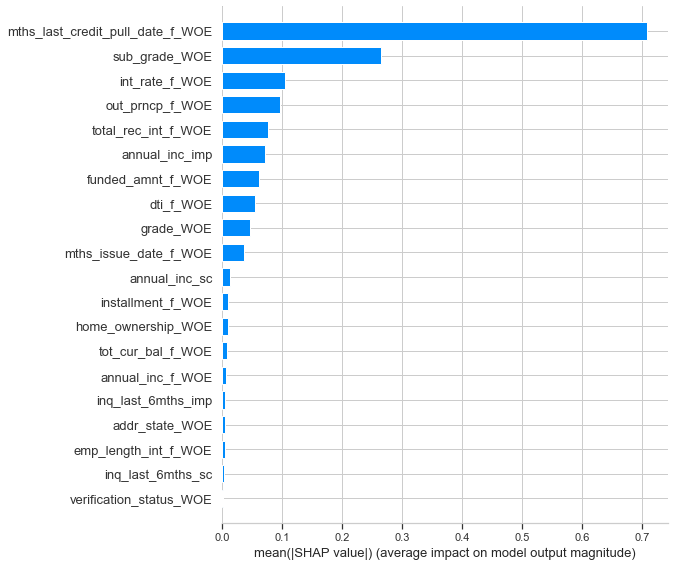

In [179]:
shap.summary_plot(shap_values, data_full.loc[mask_valid, final_pred_lgb], plot_type="bar")

## Deployment

Just load the model and put new data to predict. **REMEMBER DO NOT RE-TRAIN USING NEW DATA, EXCEPT YOU WANT TO REDEVELOP THE MODEL**. it will caused the coefficient will change.

In [181]:
# load model
filename = 'XGBModel.pickle'

with open(filename, 'rb') as fout:
    xgb_model = pickle.load(fout)

In [182]:
# use xgb_model.predict(data_input)
# data_input should be in the same format with the input given during the training (apply preprocessing first)

In [183]:
# load model
filename = 'LRModel.pickle'

with open(filename, 'rb') as fout:
    lr_model = pickle.load(fout)

In [184]:
# use lr_model.predict(data_input)
# data_input should be in the same format with the input given during the training (apply preprocessing first)